In [7]:
DISTANCE = {}
DISTANCE['Arad'] = {'Sibiu':140,'Timisoara':118,'Zerind':75}
DISTANCE['Bucharest'] = {'Fagaras':211,'Giurgiu':90,'Pitesti':101,'Urziceni':85}
DISTANCE['Craiova'] = {'Drobeta':120,'Pitesti':138,'Rimnicu Vilcea':146}
DISTANCE['Drobeta'] = {'Craiova':120,'Mehadia':75}
DISTANCE['Eforie'] = {'Hirsova':86}
DISTANCE['Fagaras'] = {'Bucharest':211,'Sibiu':99}
DISTANCE['Giurgiu'] = {'Bucharest':90}
DISTANCE['Hirsova'] = {'Eforie':86,'Urziceni':98}
DISTANCE['Iasi'] = {'Neamt':87,'Vaslui':92}
DISTANCE['Lugoj'] = {'Mehadia':70,'Timisoara':111}
DISTANCE['Mehadia'] = {'Drobeta':75,'Lugoj':70}
DISTANCE['Neamt'] = {'Iasi':87}
DISTANCE['Oradea'] = {'Sibiu':151,'Zerind':71}
DISTANCE['Pitesti'] = {'Bucharest':101,'Craiova':138,'Rimnicu Vilcea':97}
DISTANCE['Rimnicu Vilcea'] = {'Craiova':146,'Pitesti':97,'Sibiu':80}
DISTANCE['Sibiu'] = {'Arad':140,'Fagaras':99,'Oradea':151,'Rimnicu Vilcea':80}
DISTANCE['Timisoara'] = {'Arad':118,'Lugoj':111}
DISTANCE['Urziceni'] = {'Bucharest':85,'Hirsova':98,'Vaslui':142}
DISTANCE['Vaslui'] = {'Iasi':92,'Urziceni':142}
DISTANCE['Zerind'] = {'Arad':75,'Oradea':71}

PREDECESSOR = {}
FVALUE = {}
COUNT = 0

def successors(city):
    return DISTANCE[city]
    
def listDifference(list1, list2):
    list3 = list(list1)
    for elt in list2:
        if elt in list3: 
            list3.remove(elt)
    return list3
    
def f(m, n):
    return FVALUE[n] + DISTANCE[m][n]
    
def extractPath(n):
    if PREDECESSOR[n]==None: return [n]
    return extractPath(PREDECESSOR[n]) + [n]
    
def deleteMin(lst, fn):
    minVal = 9999
    minElt = None
    for e in lst:
        temp = FVALUE[e]
        if temp < minVal: minVal = temp; minElt = e
    lst.remove(minElt)
    return minElt
    
def insert(elt, lst):
    if lst == []:
        return [elt]
    if FVALUE[elt] < FVALUE[lst[0]]:
        return [elt] + lst
    else:
        return [lst[0]] + insert(elt, lst[1:])
        
def unifcost(start, goal):
    OPEN = [start]
    CLOSED = []
    PREDECESSOR[start] = None
    FVALUE[start] = 0
    while OPEN != []:
        n = deleteMin(OPEN, FVALUE)
        CLOSED.append(n)
        global COUNT
        COUNT += 1
        if n == goal:
            return extractPath(n)
        lst = successors(n)
        lst = listDifference(lst, CLOSED)
        for elt in lst:
            temp = f(elt, n)
            if elt in OPEN:
                if temp < FVALUE[elt]:
                    FVALUE[elt] = temp
                    PREDECESSOR[elt] = n
                    OPEN.remove(elt)
                    OPEN = insert(elt, OPEN)
            else:
                if not elt in CLOSED:
                    FVALUE[elt] = temp
                    PREDECESSOR[elt] = n
                    OPEN = insert(elt, OPEN)
                    
def test1():
    start = 'Arad'
    goal = 'Bucharest'
    print(f"Đường đi ngắn nhất từ thành phố {start} đến {goal} là:")
    path = unifcost(start, goal)
    print (path)
    global COUNT
    print('Tổng số nút được xét là: ' + str(COUNT))
    print('Tổng khoảng cách lối đi là: ' + str(FVALUE[goal]))

def test2():
    start = 'Rimnicu Vilcea'
    goal = 'Urziceni'
    print(f"Đường đi ngắn nhất từ thành phố {start} đến {goal} là:")
    path = unifcost(start, goal)
    print (path)
    global COUNT
    print('Tổng số nút được xét là: ' + str(COUNT))
    print('Tổng khoảng cách lối đi là: ' + str(FVALUE[goal]))

def test3():
    start = 'Timisoara'
    goal = 'Giurgiu'
    print(f"Đường đi ngắn nhất từ thành phố {start} đến {goal} là:")
    path = unifcost(start, goal)
    print (path)
    global COUNT
    print('Tổng số nút được xét là: ' + str(COUNT))
    print('Tổng khoảng cách lối đi là: ' + str(FVALUE[goal]))
    
test1()
test2()
test3()

Đường đi ngắn nhất từ thành phố Timisoara đến Giurgiu là:
['Timisoara', 'Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest', 'Giurgiu']
Tổng số nút được xét là: 15
Tổng khoảng cách lối đi là: 626


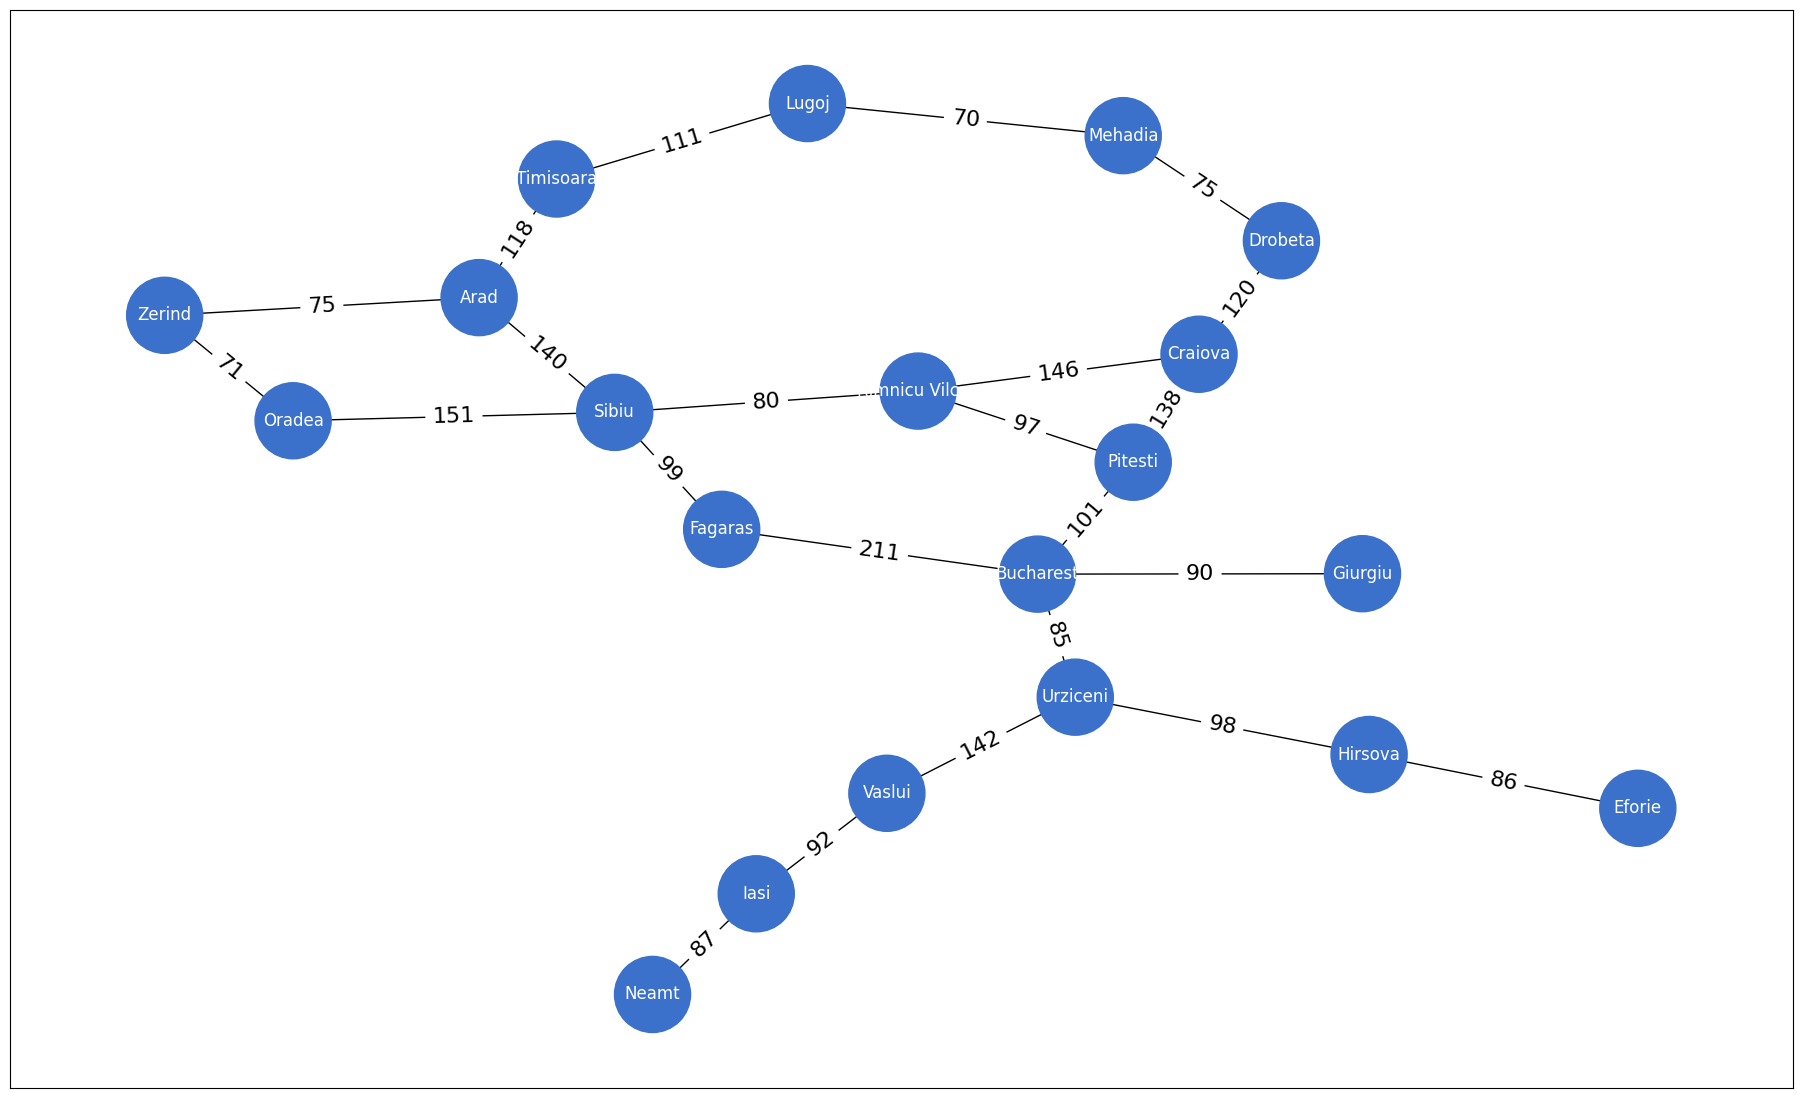

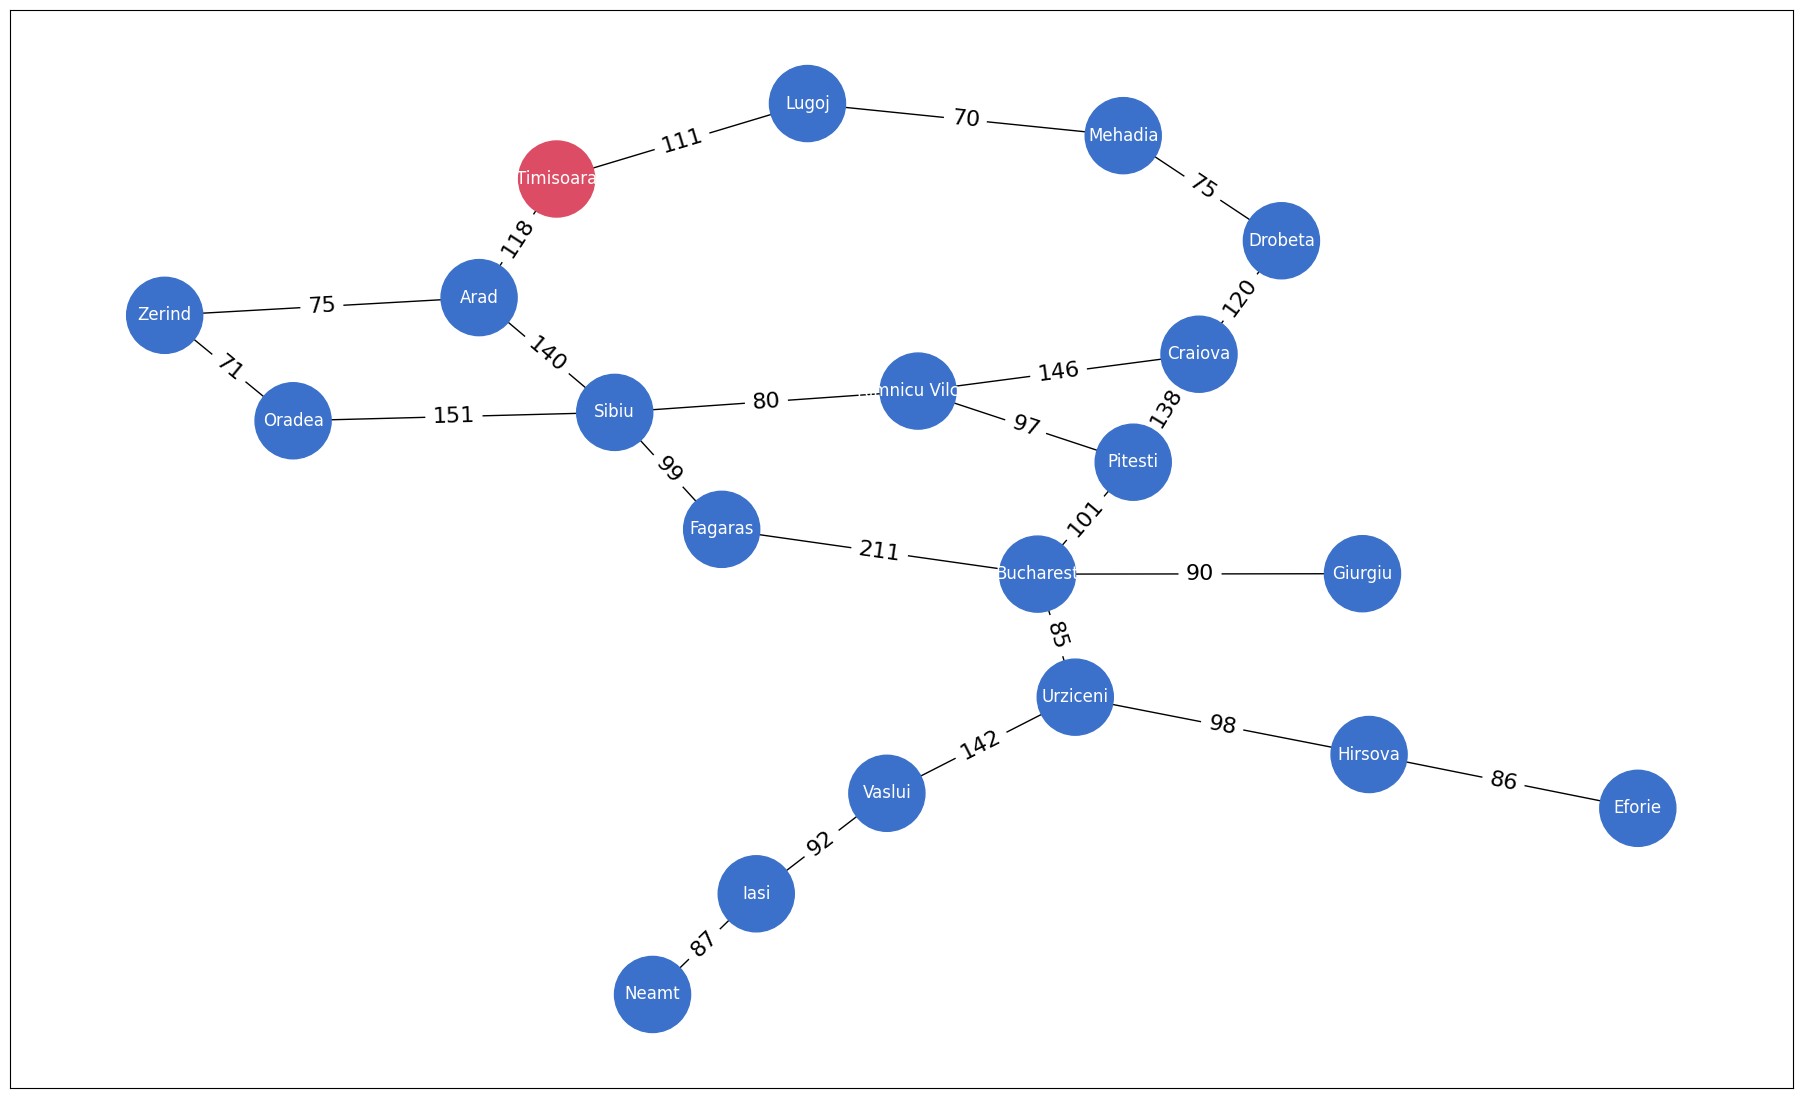

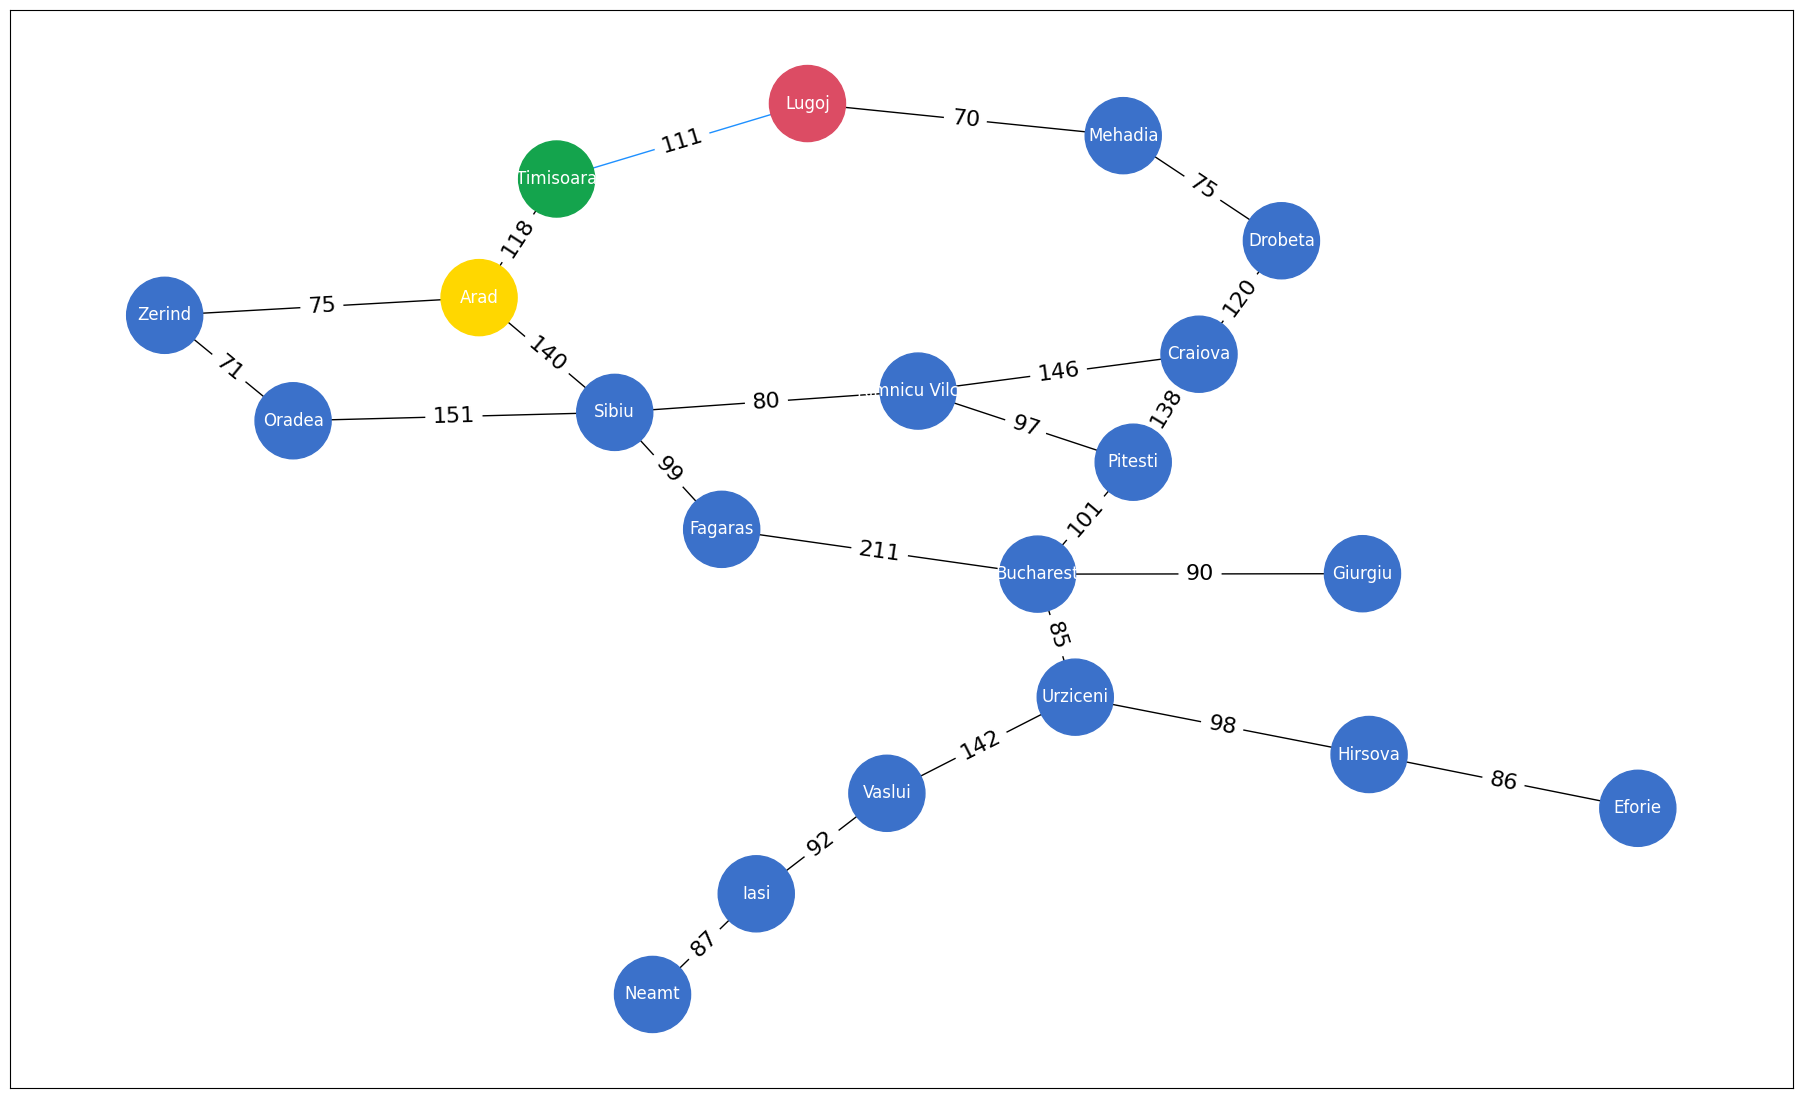

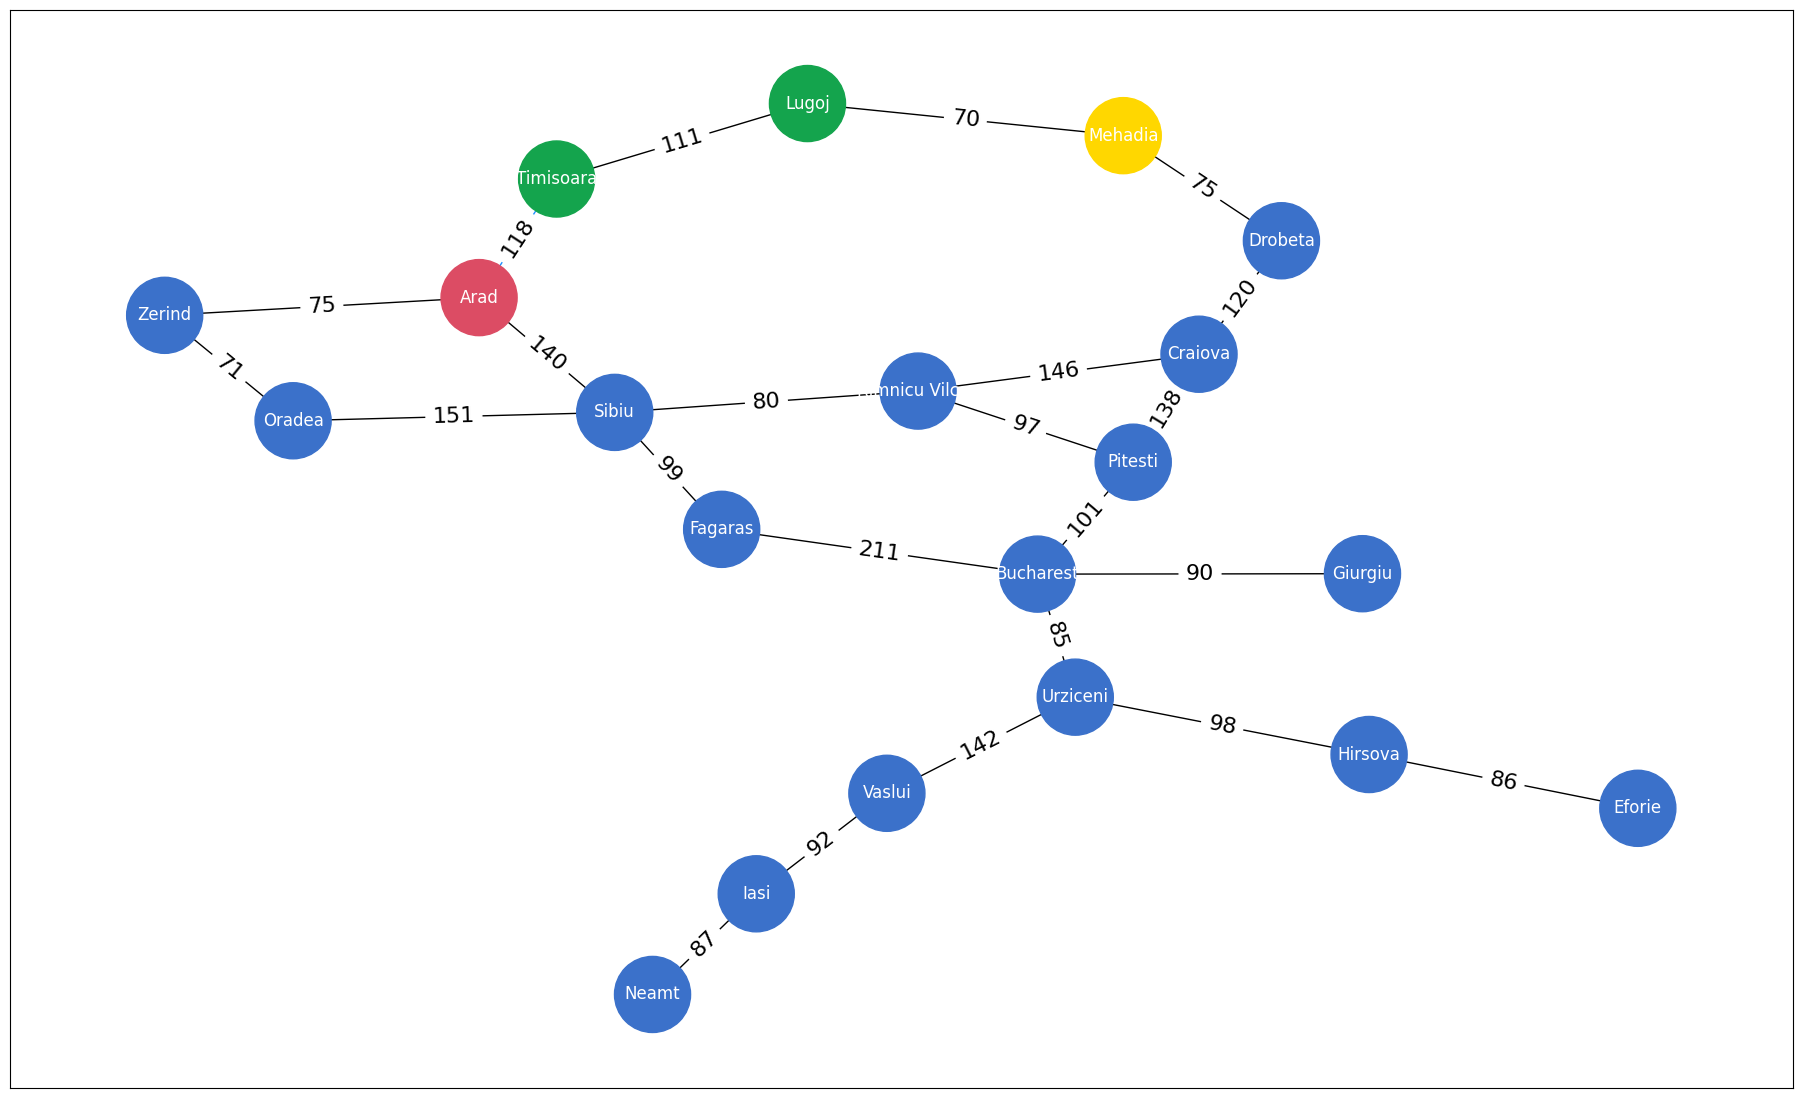

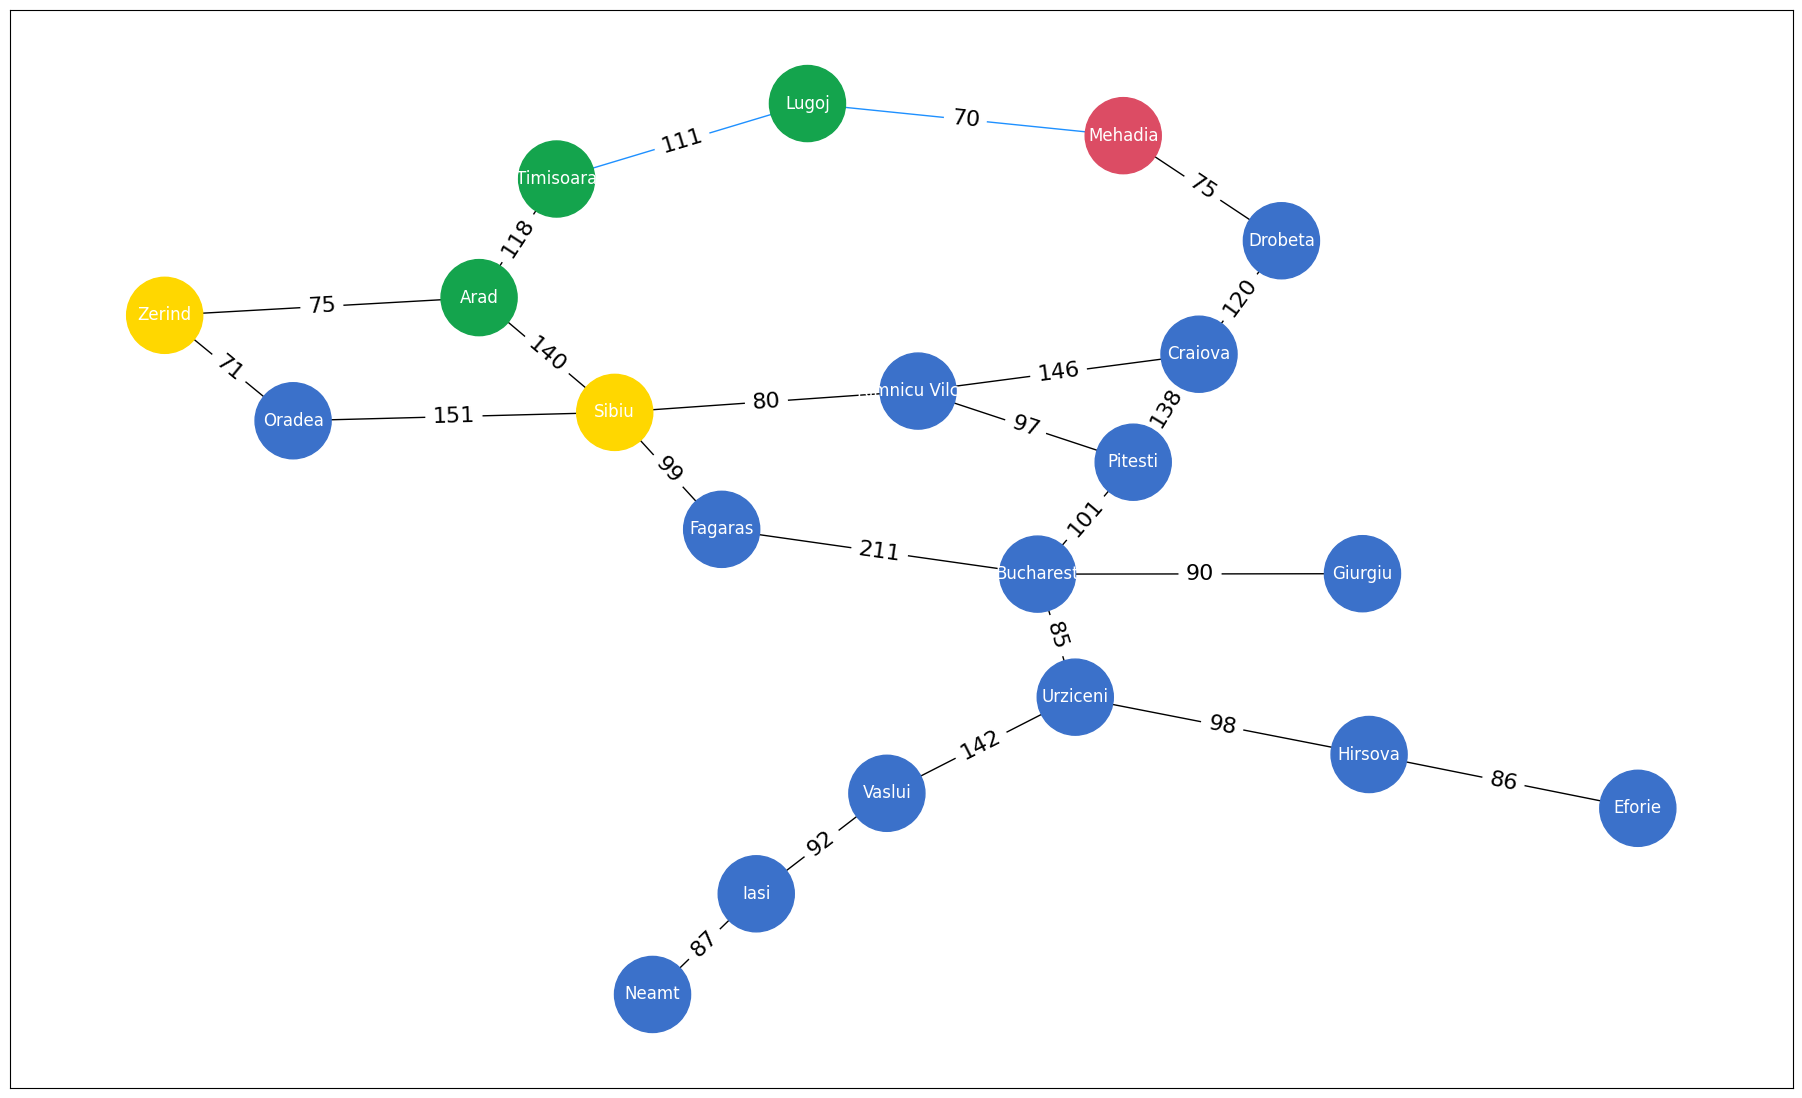

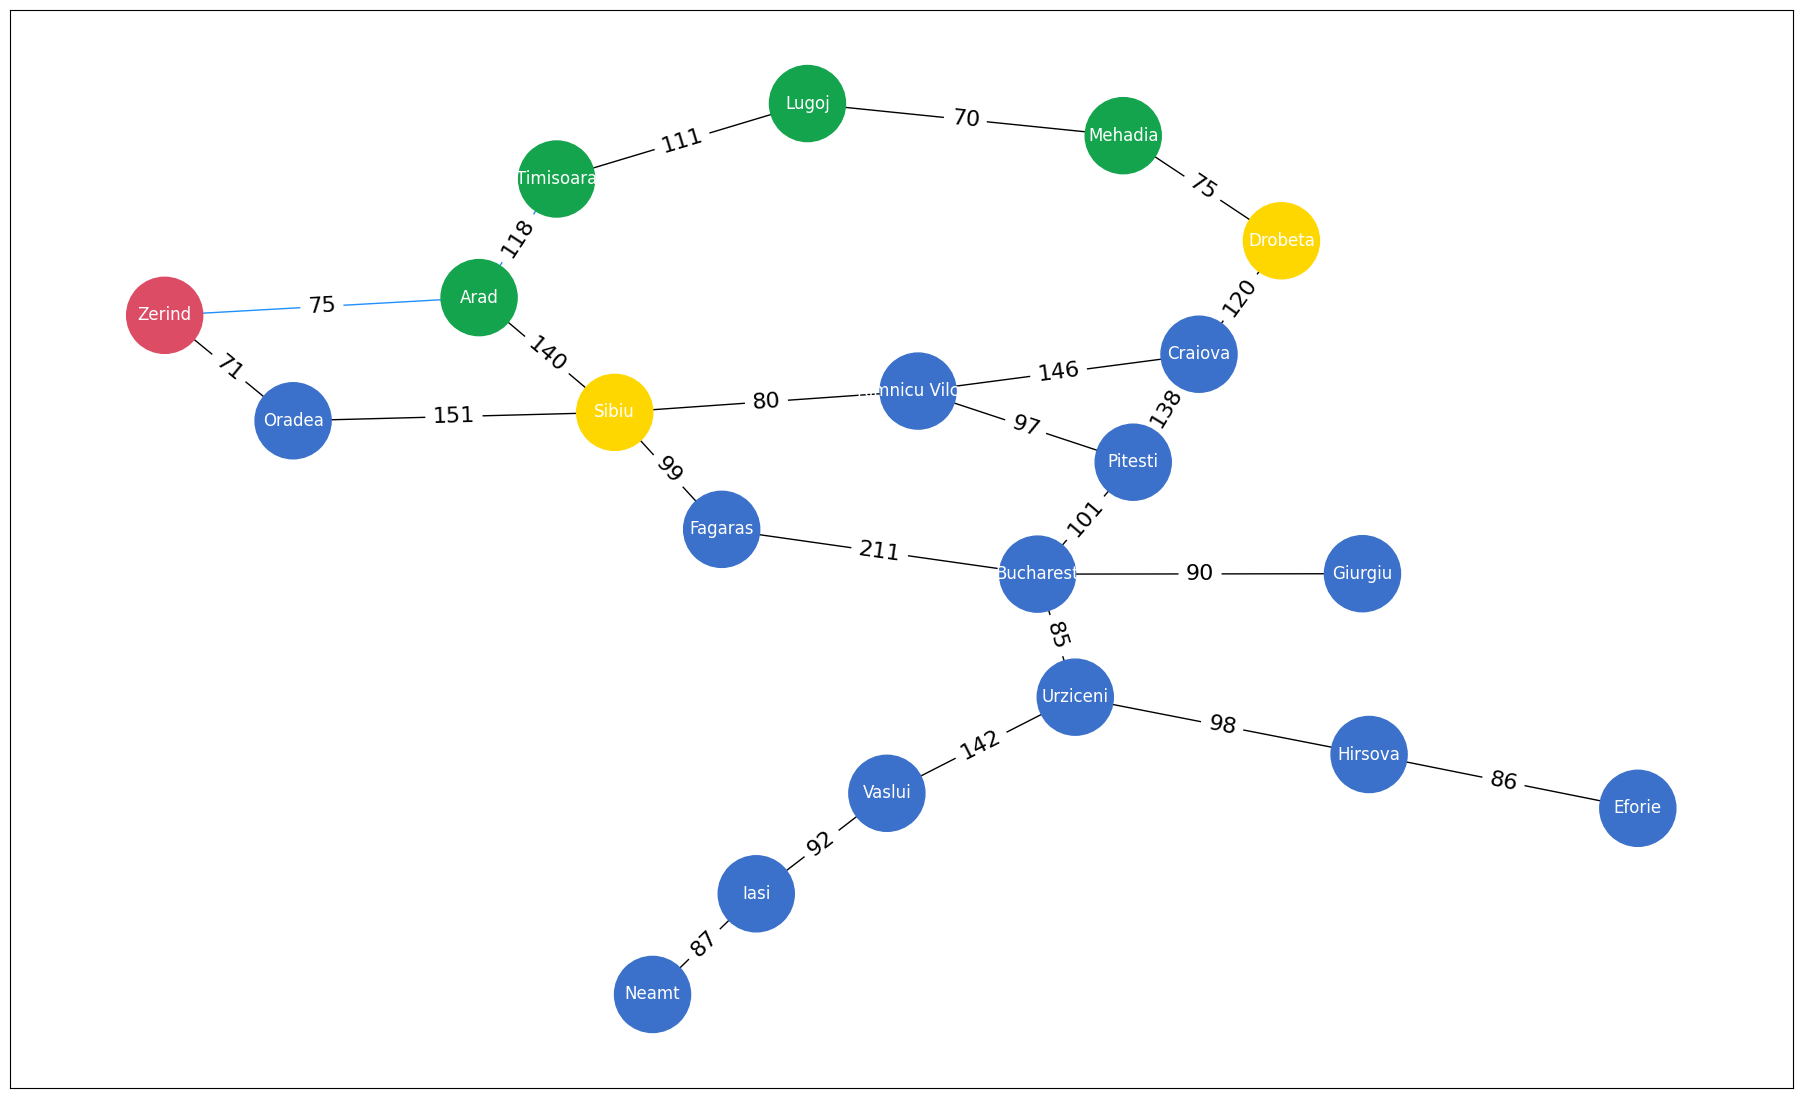

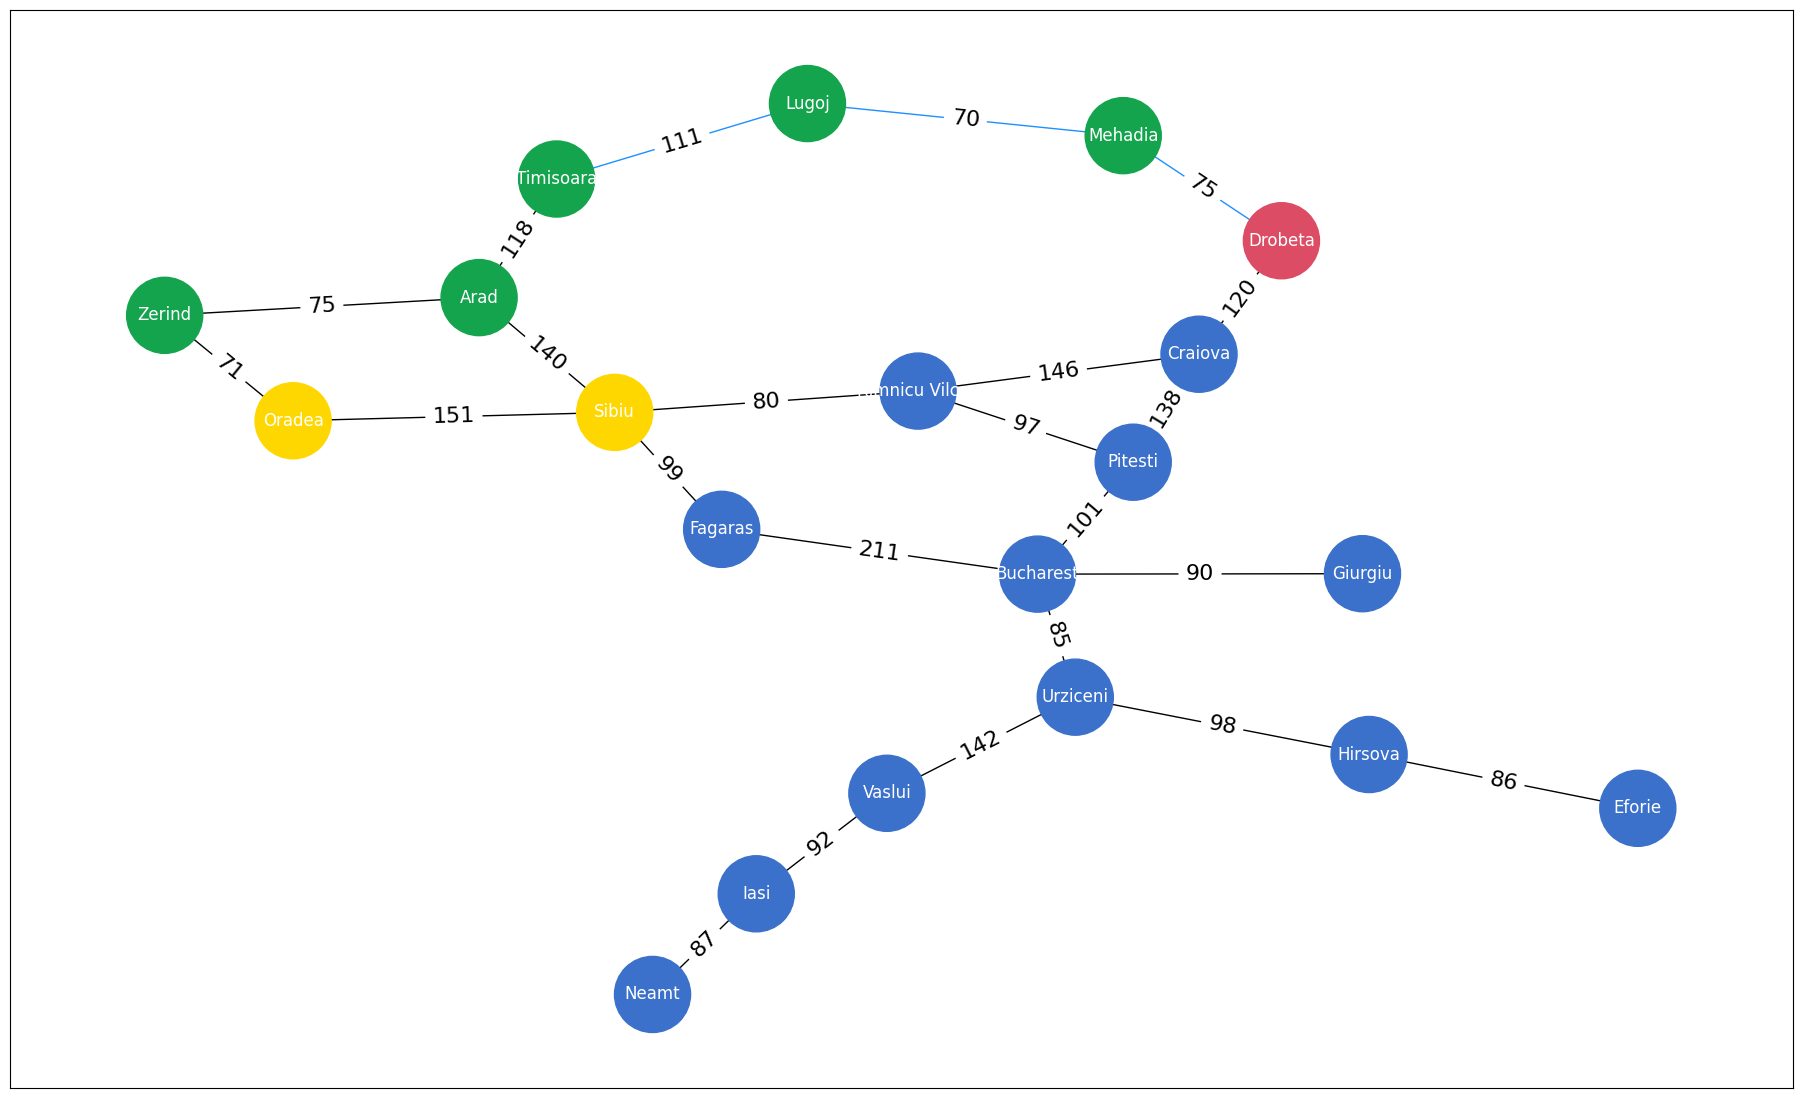

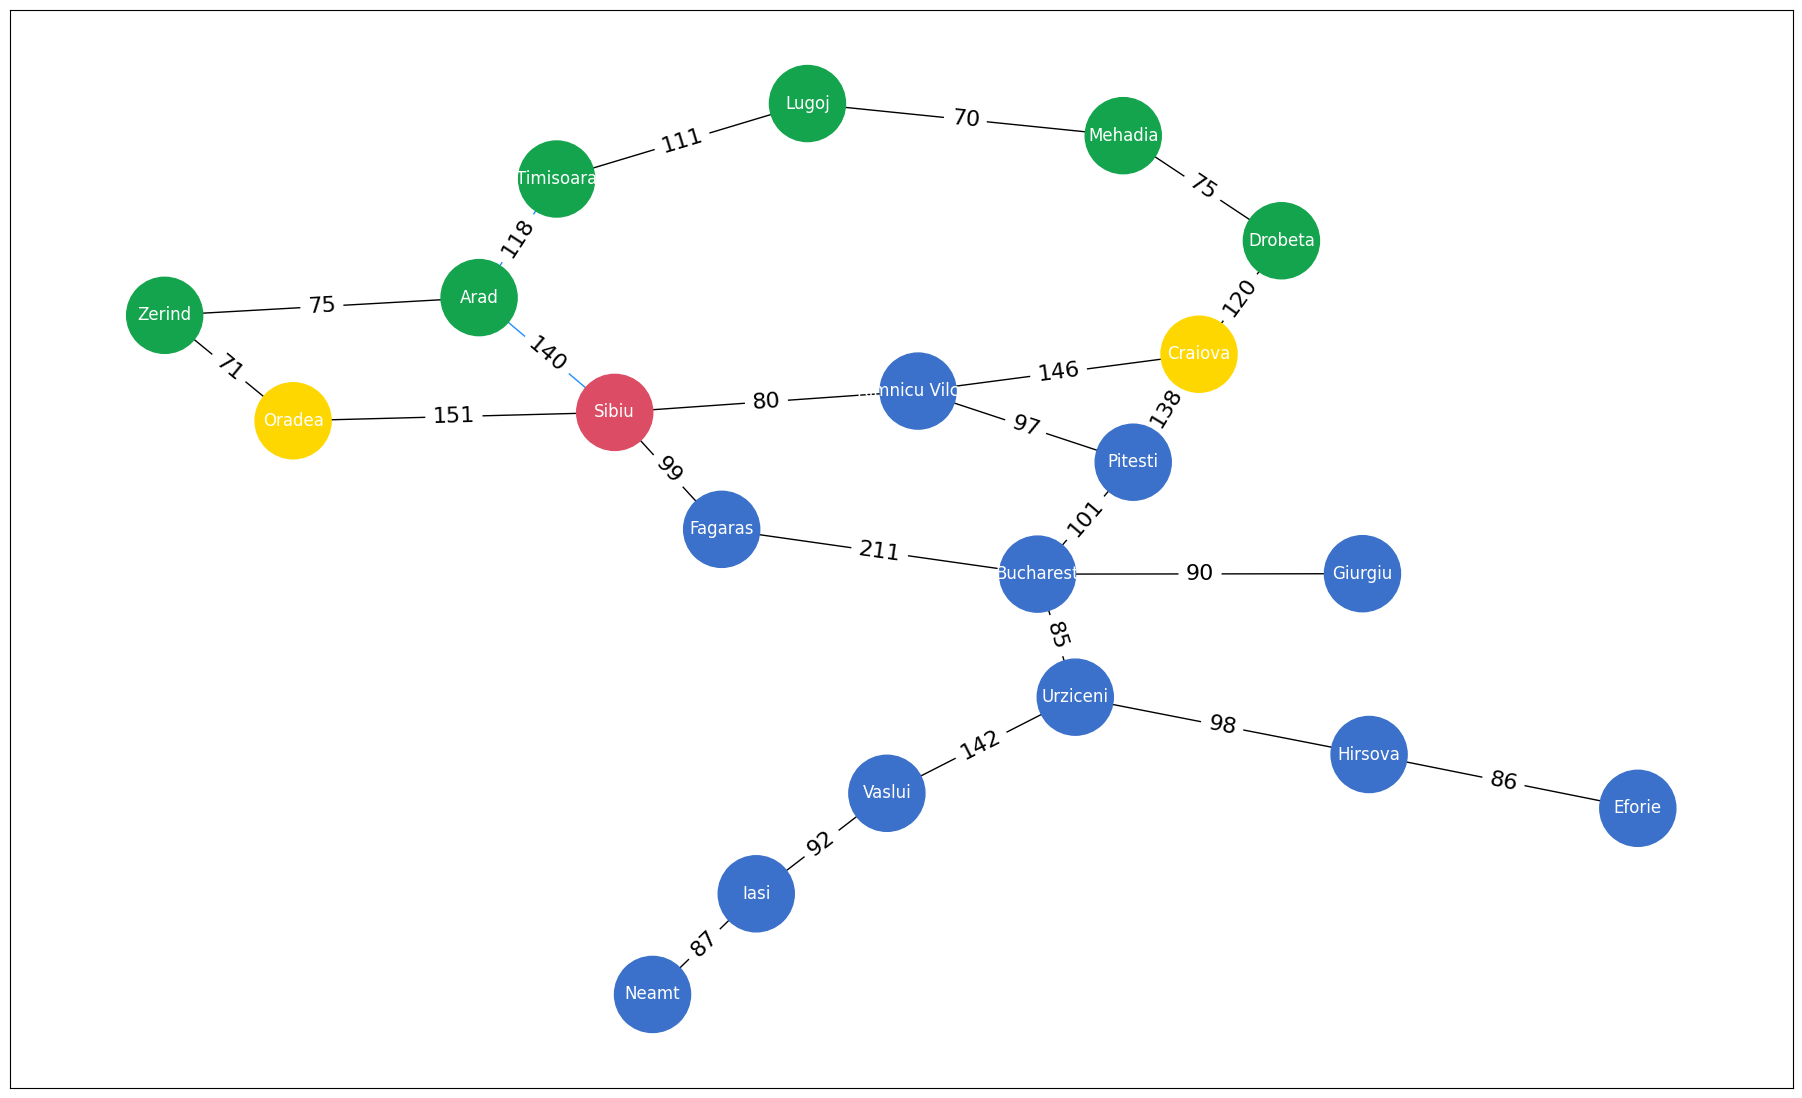

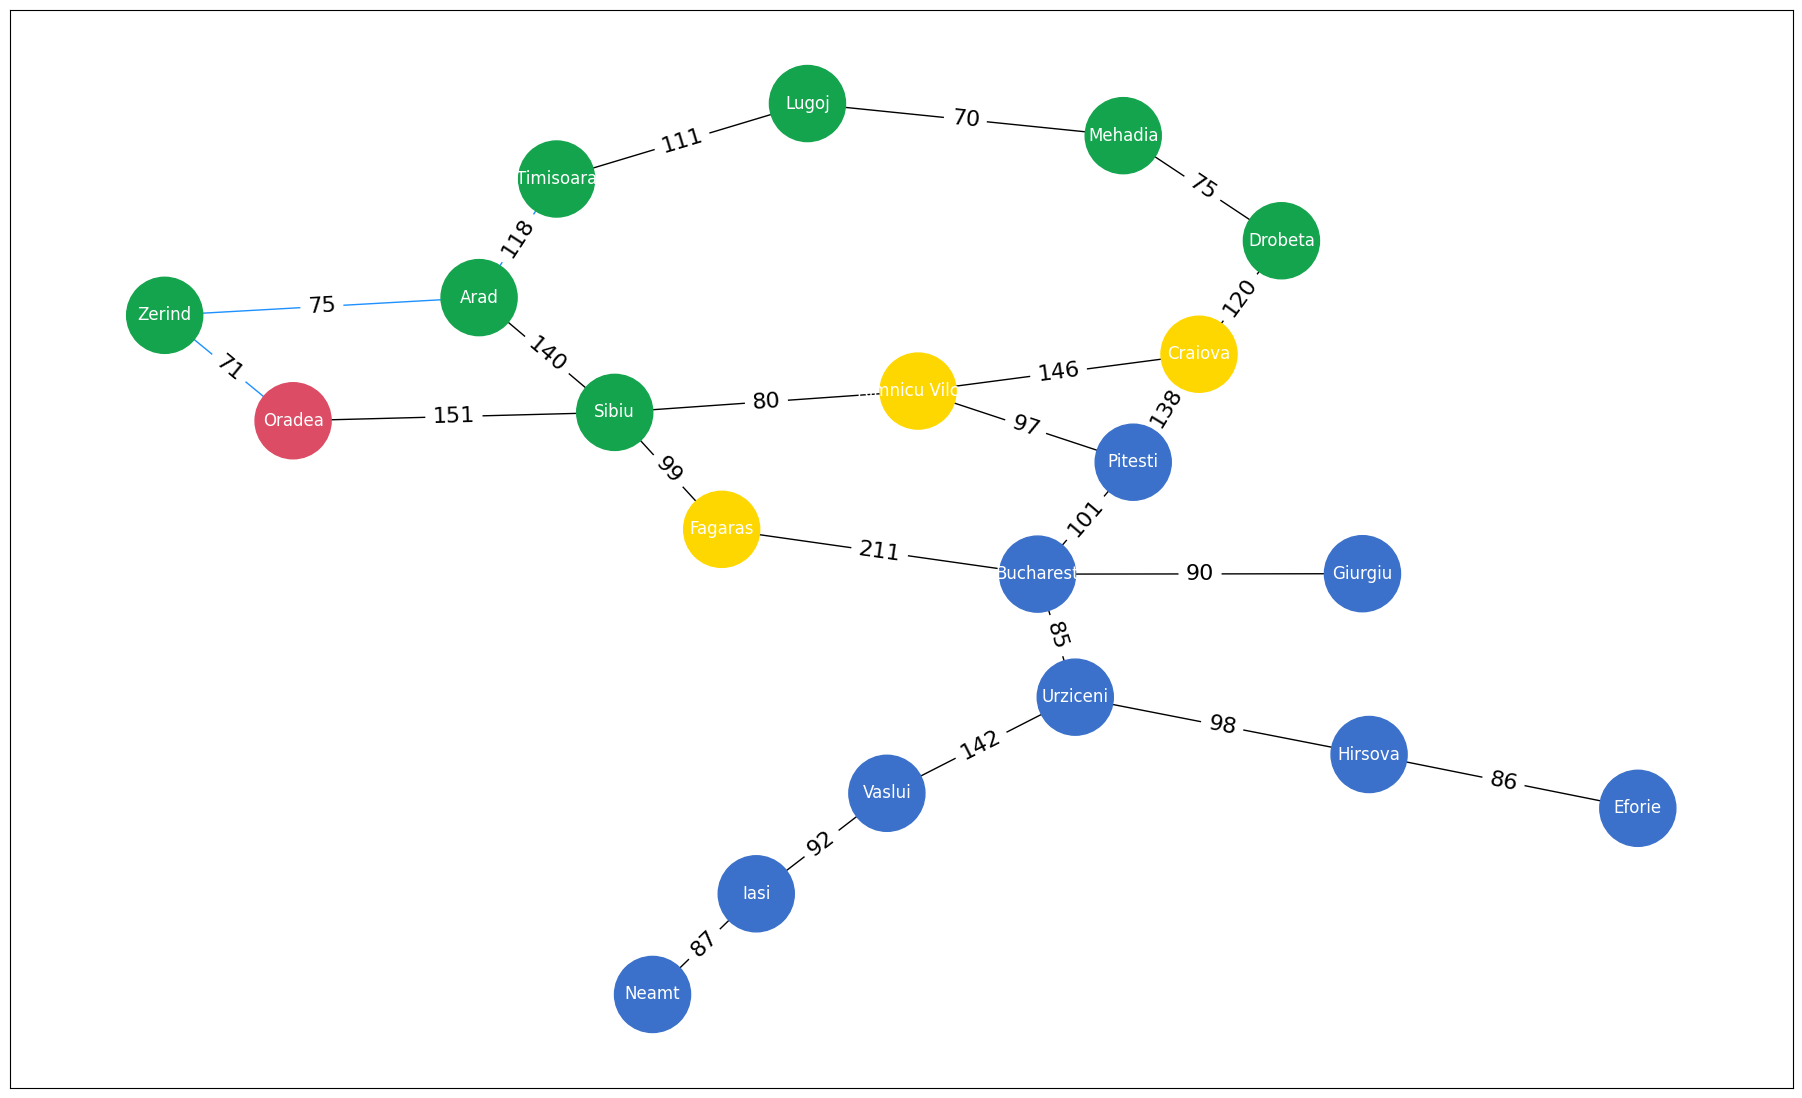

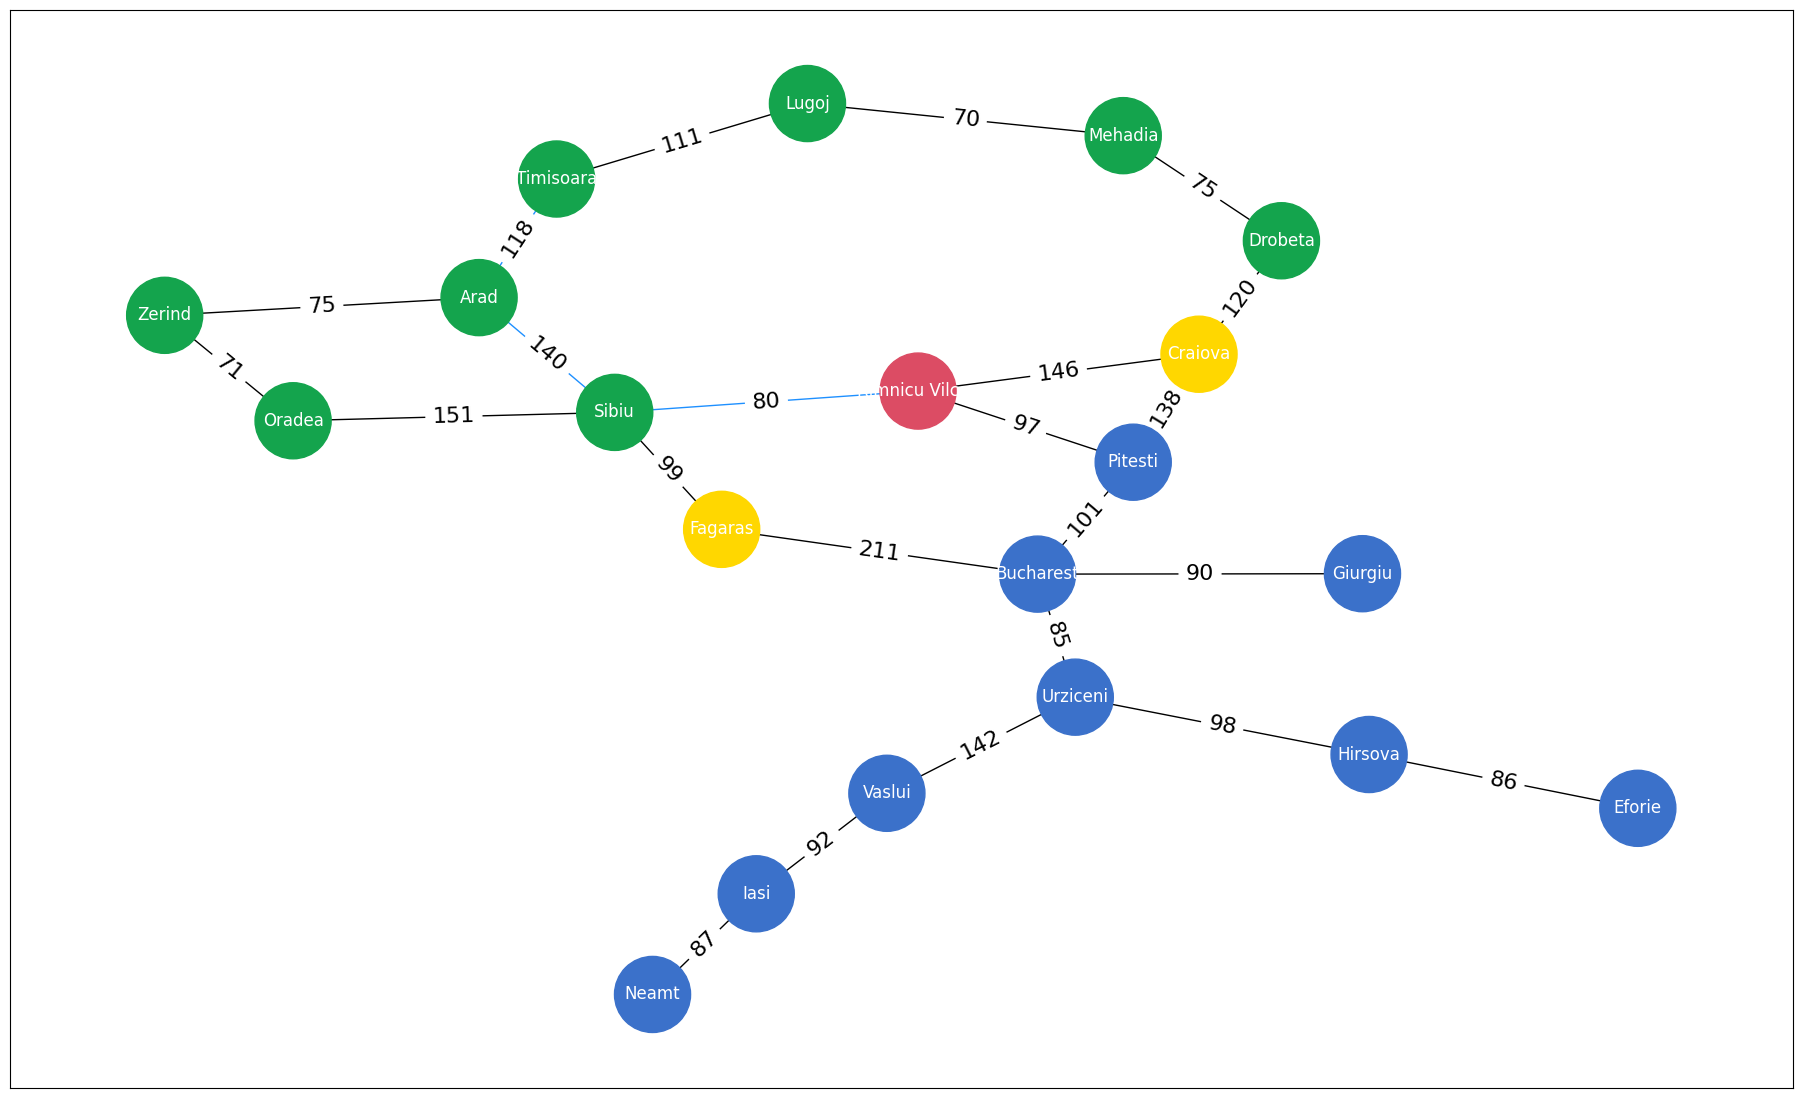

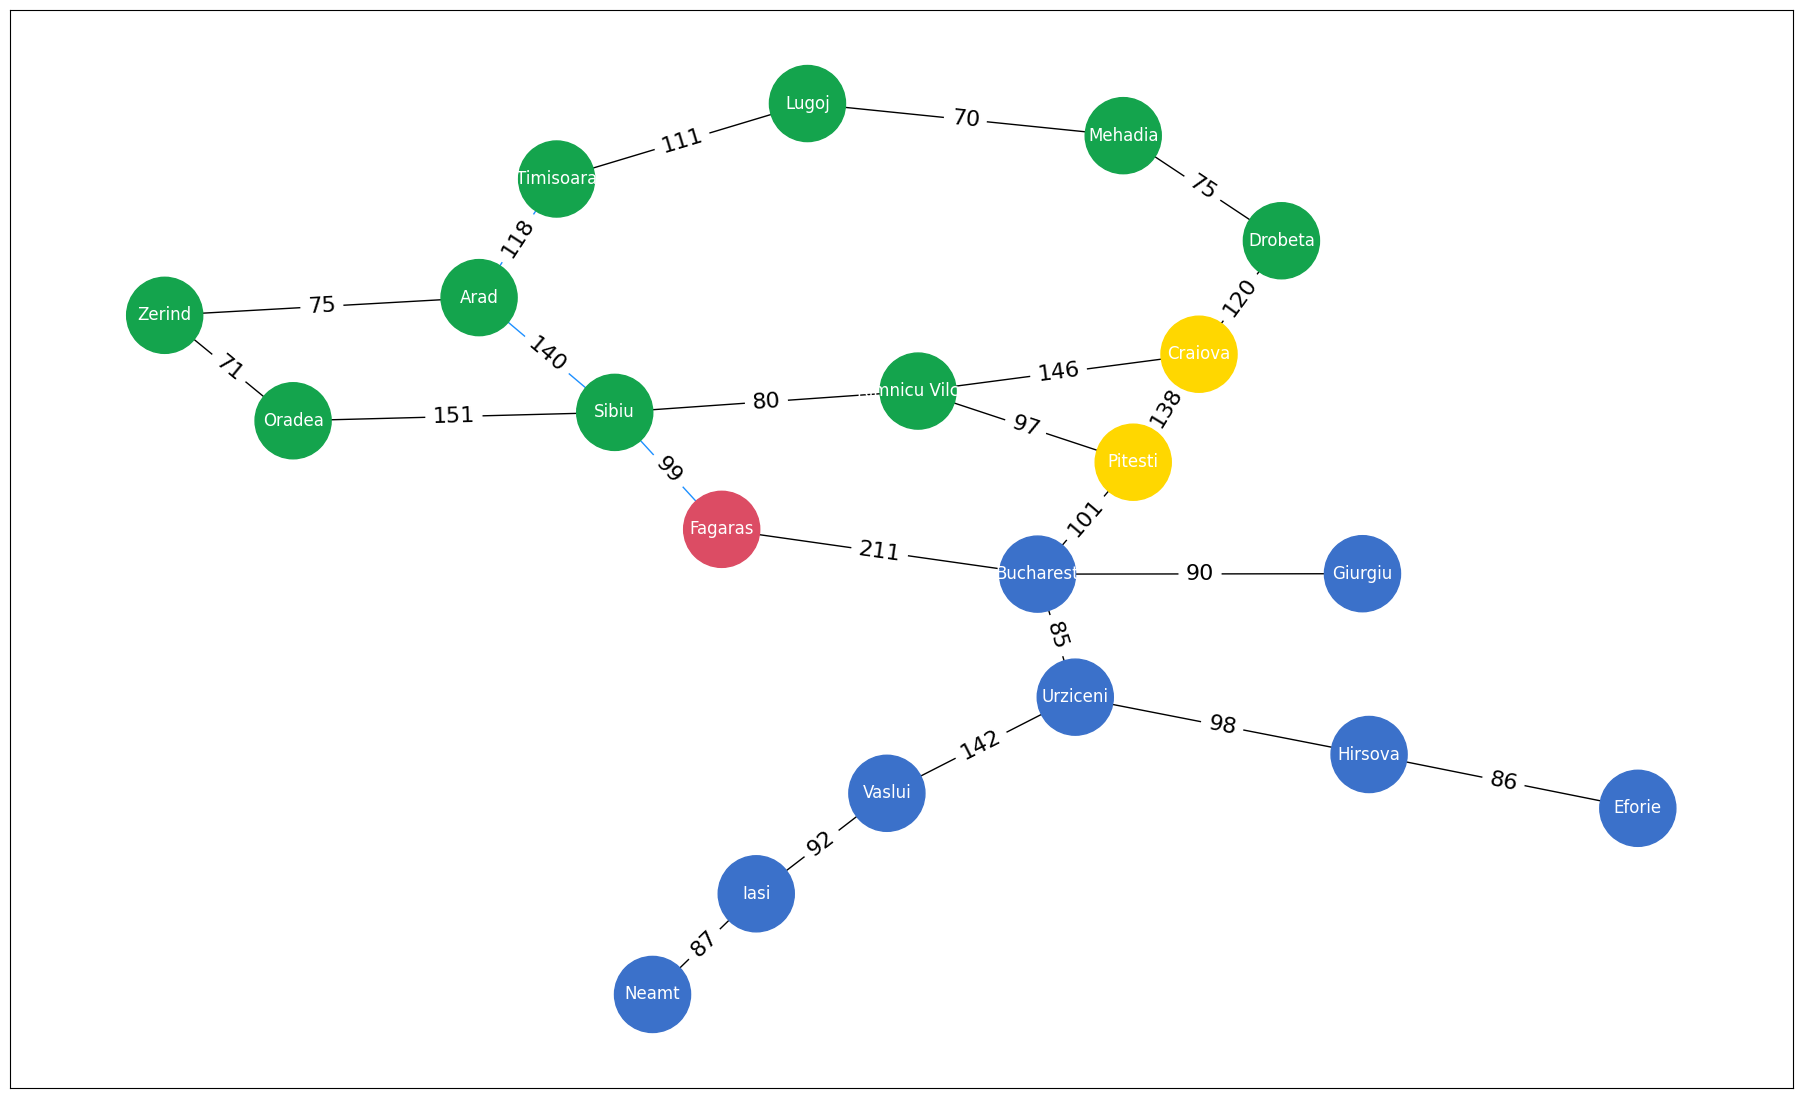

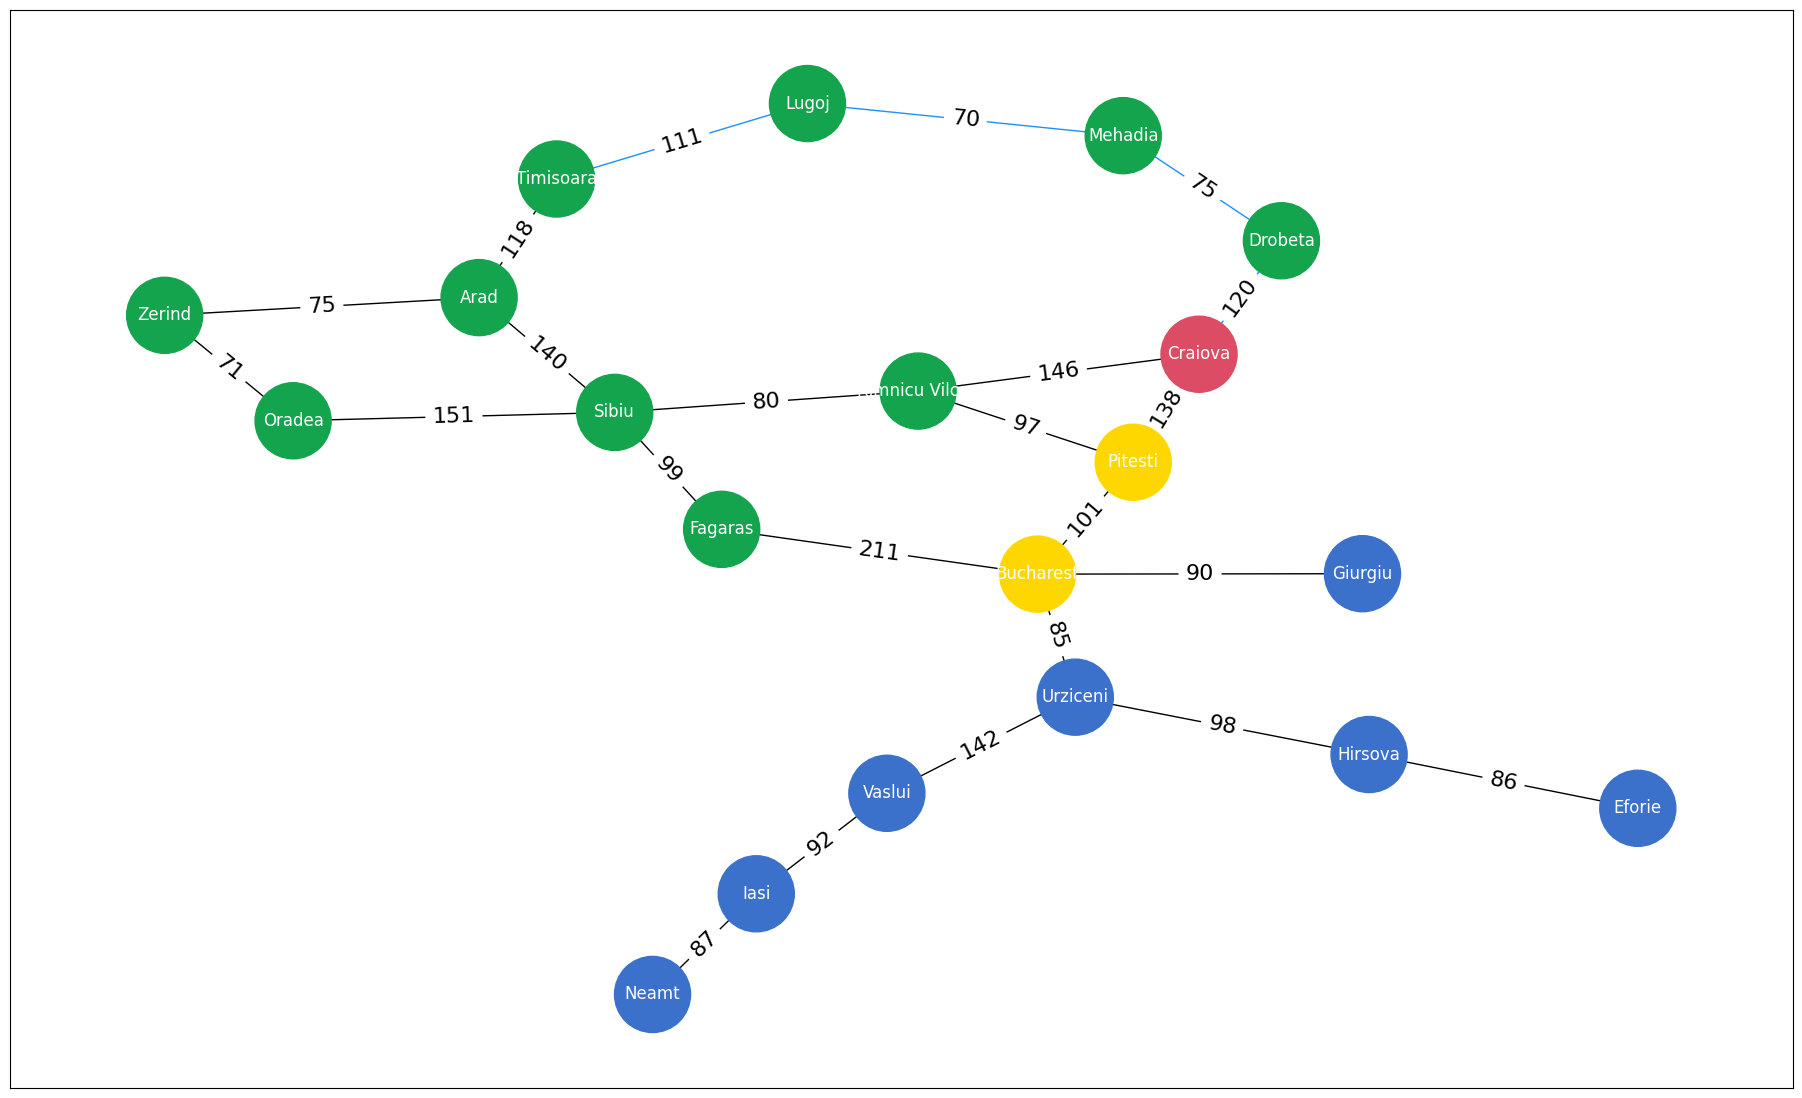

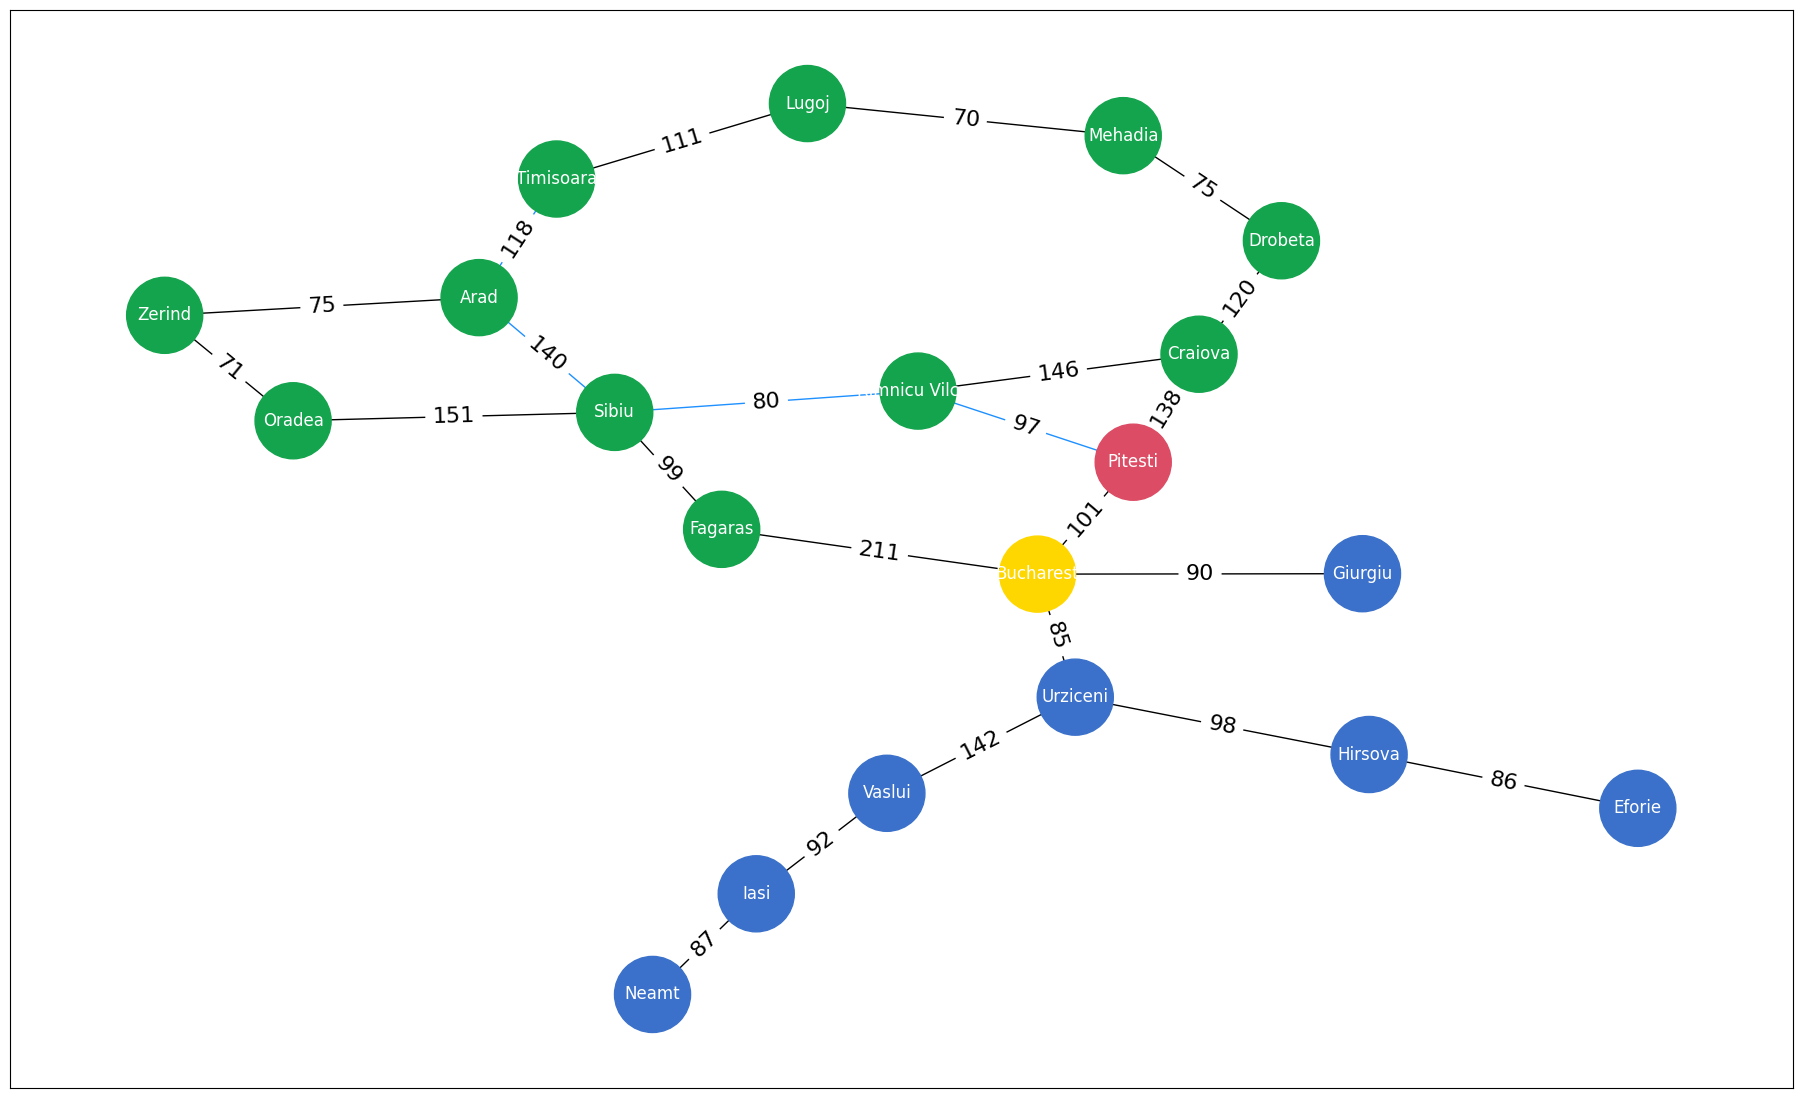

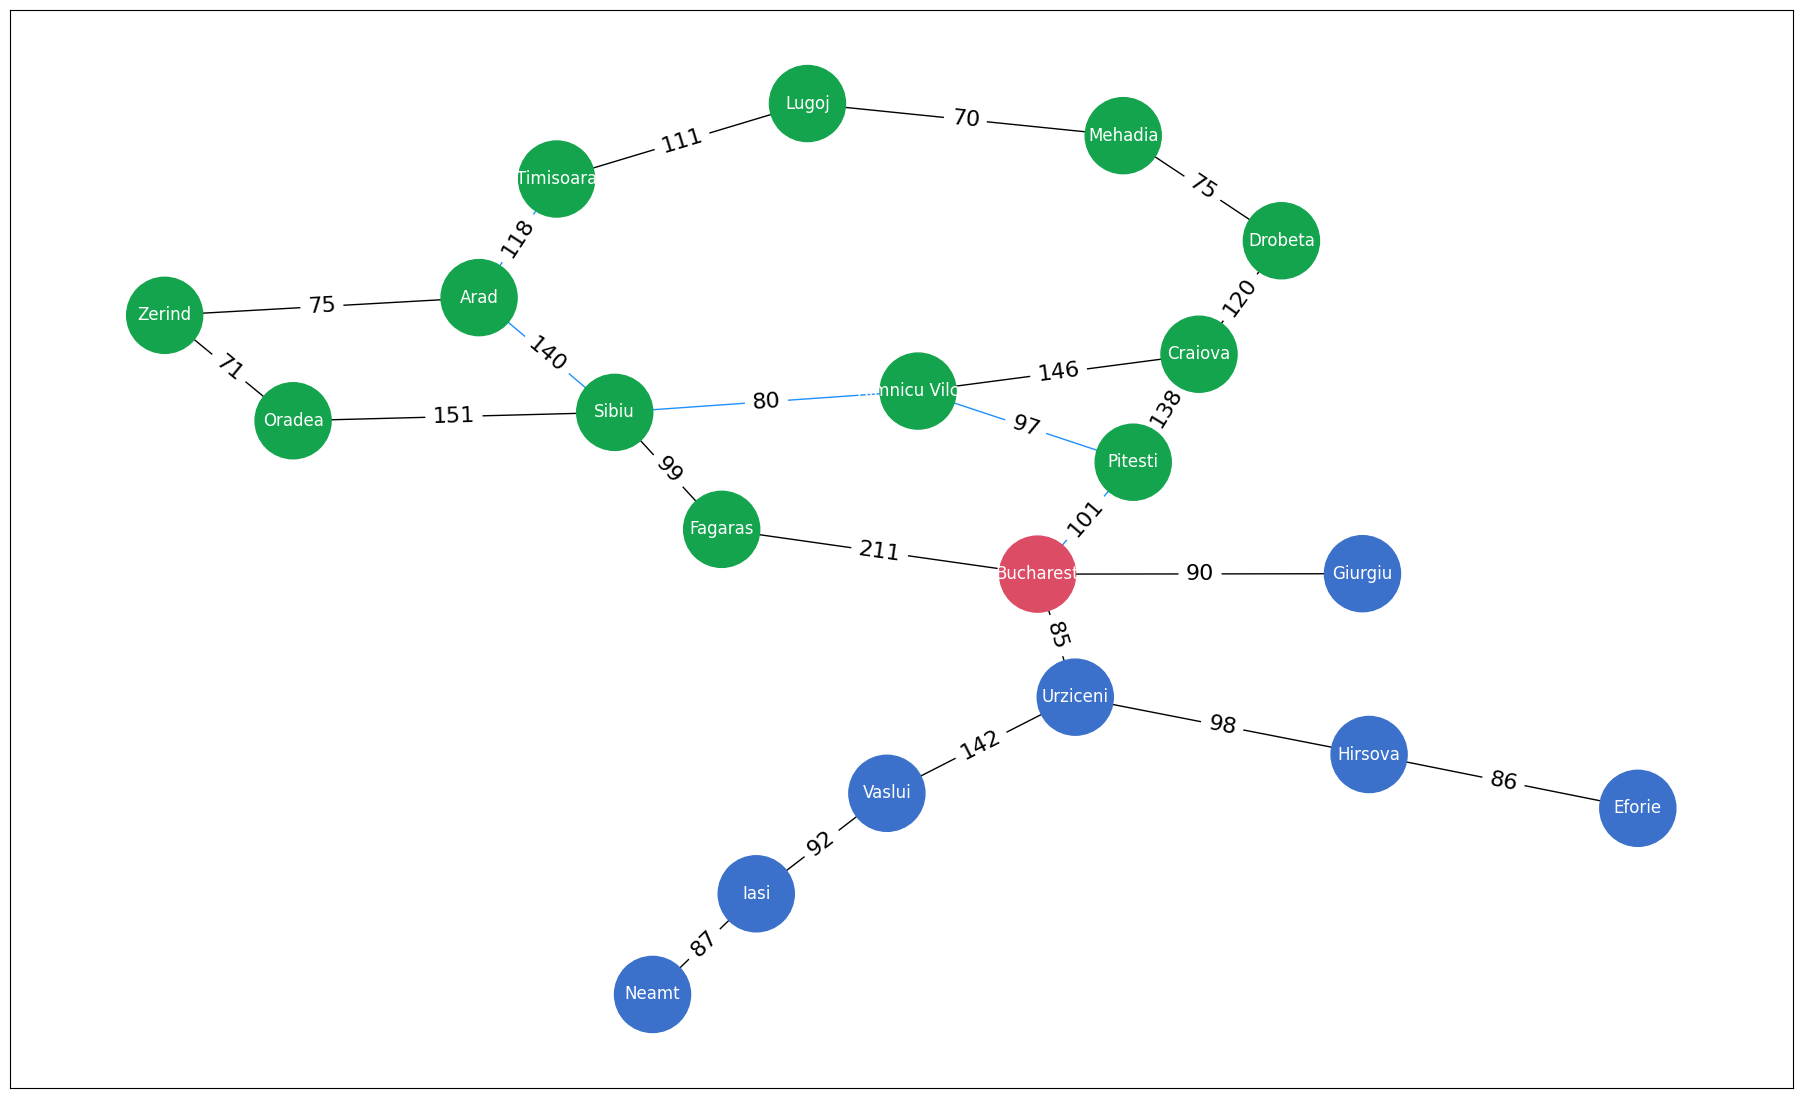

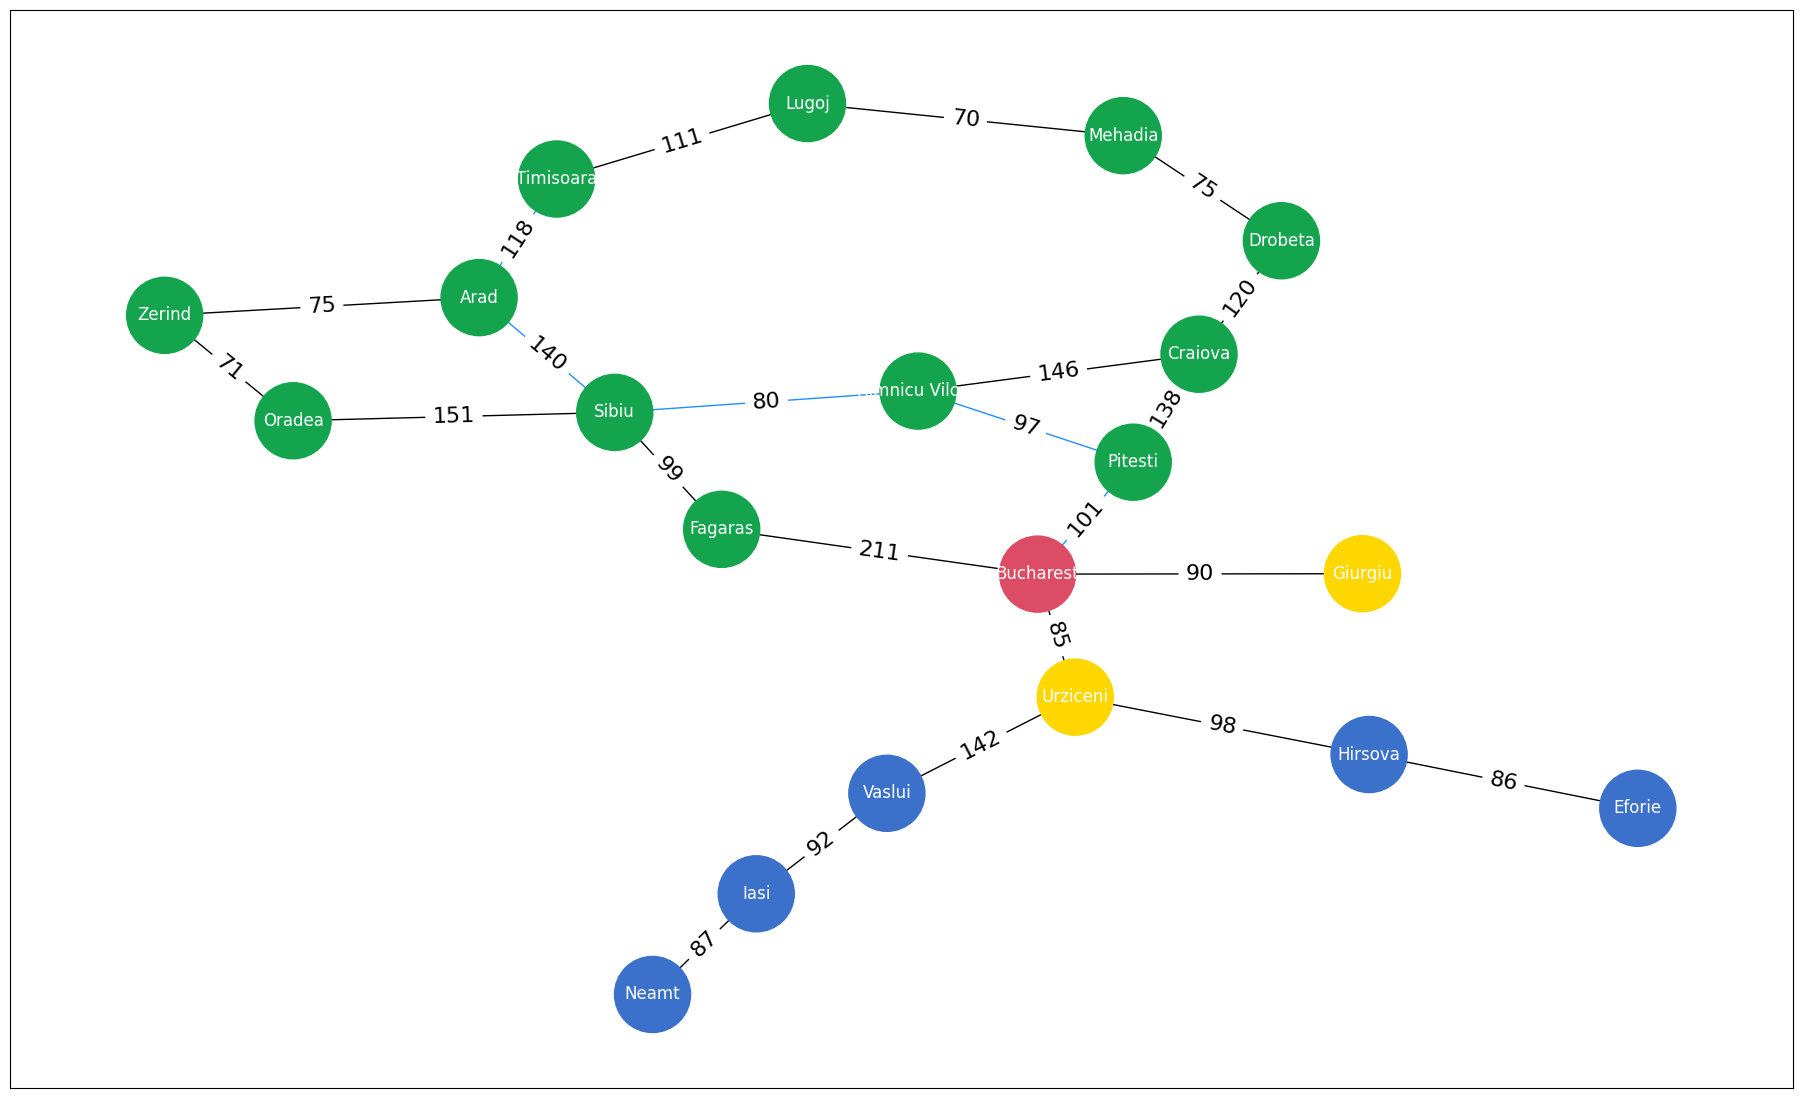

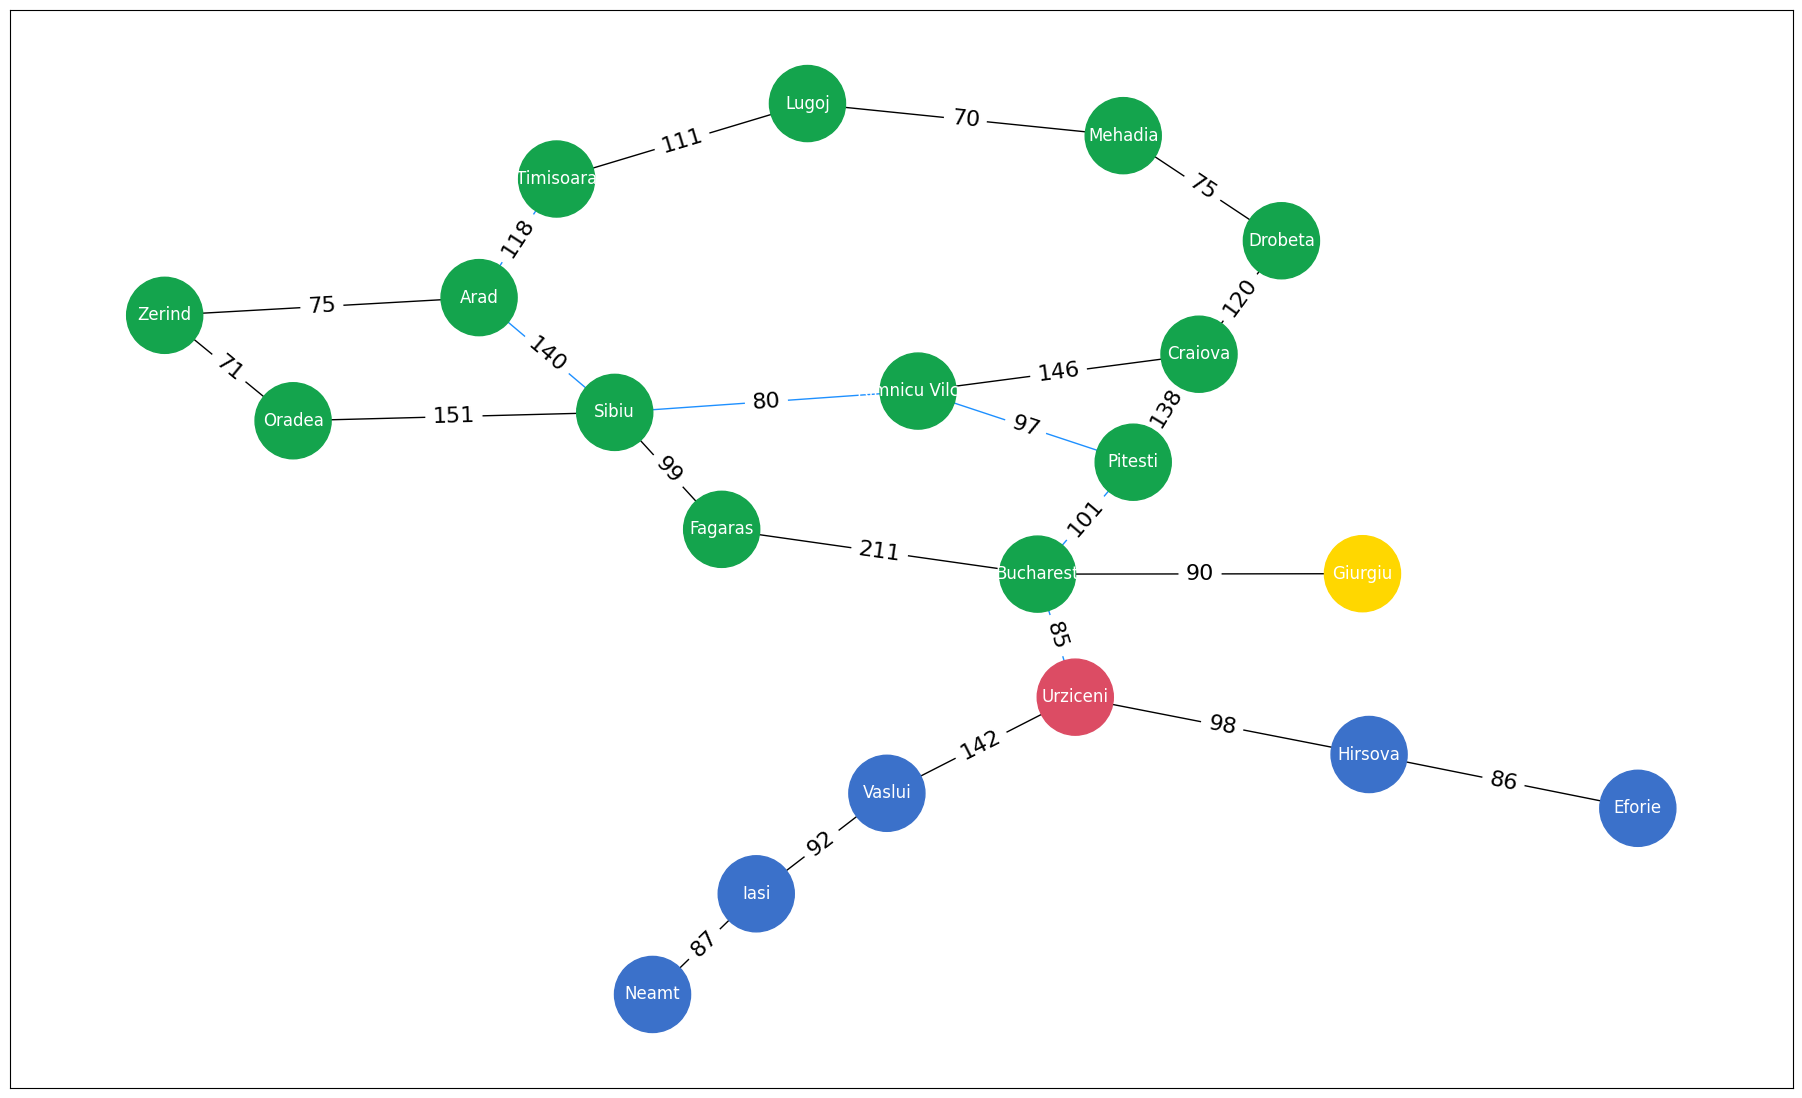

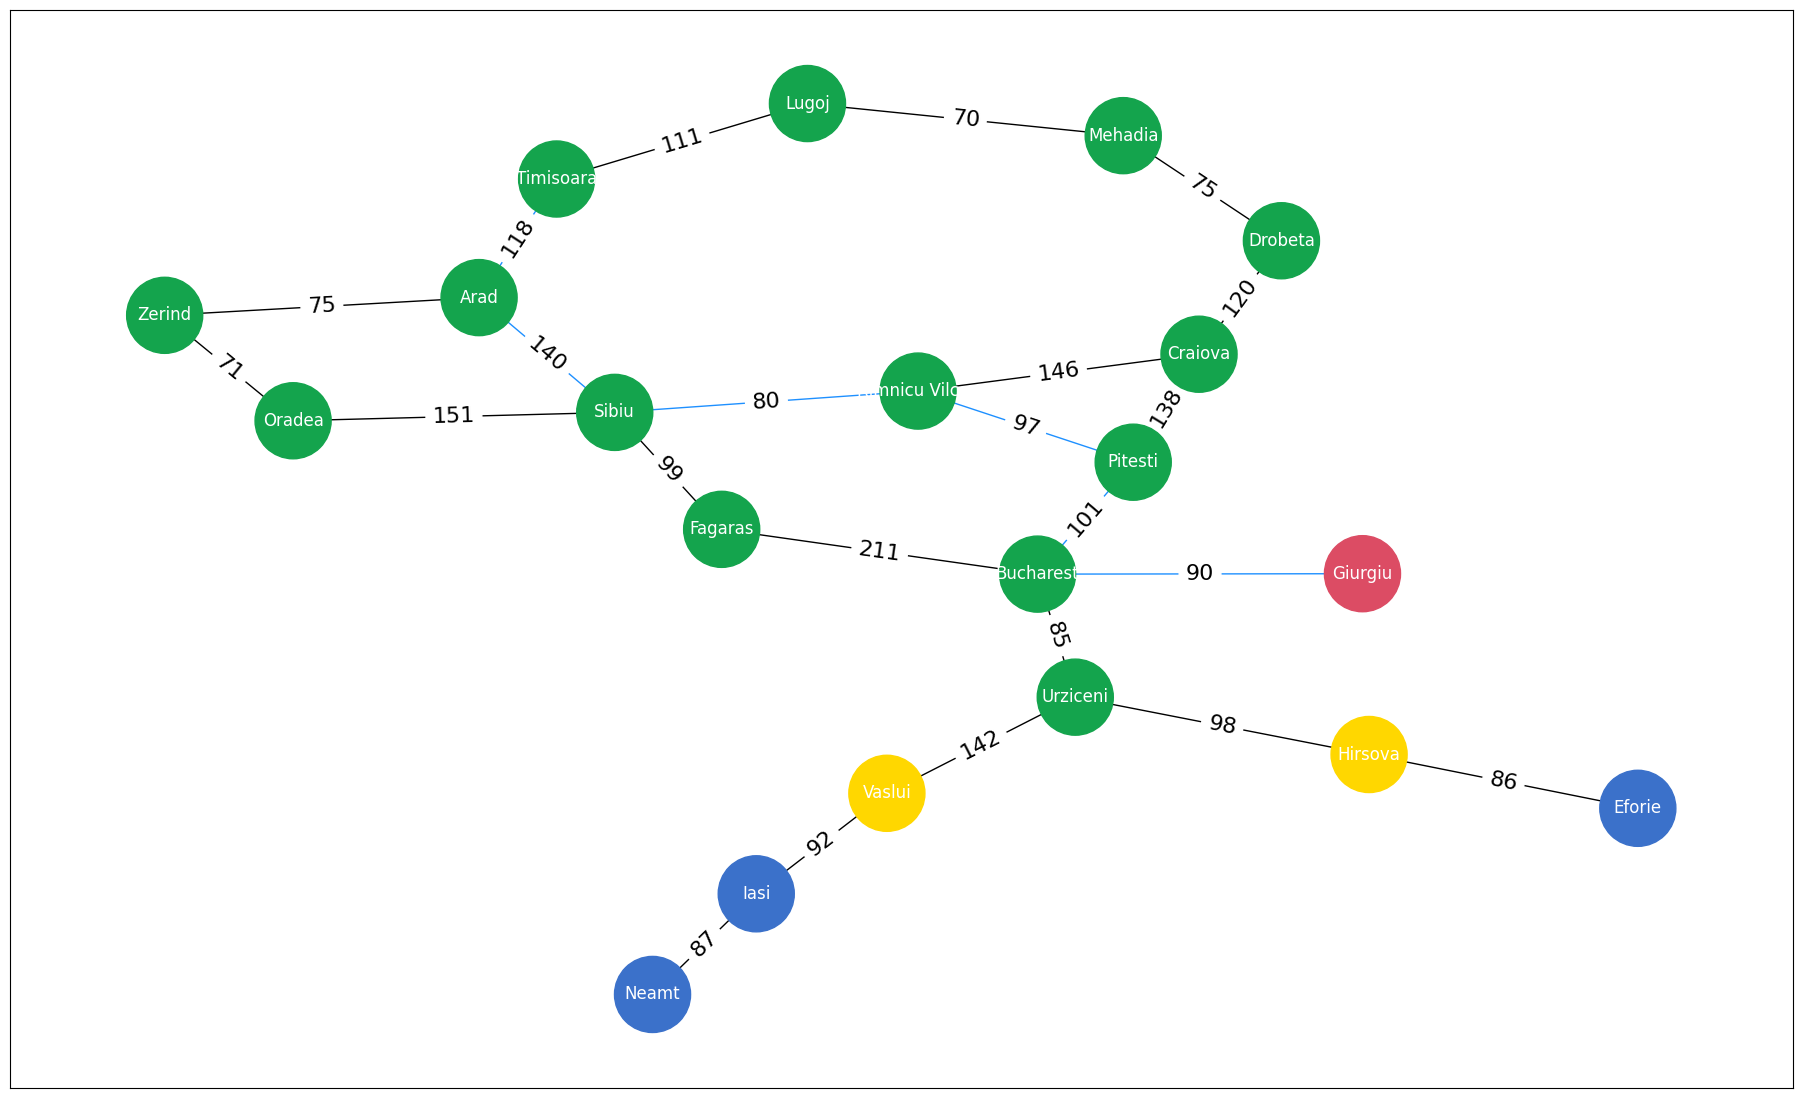

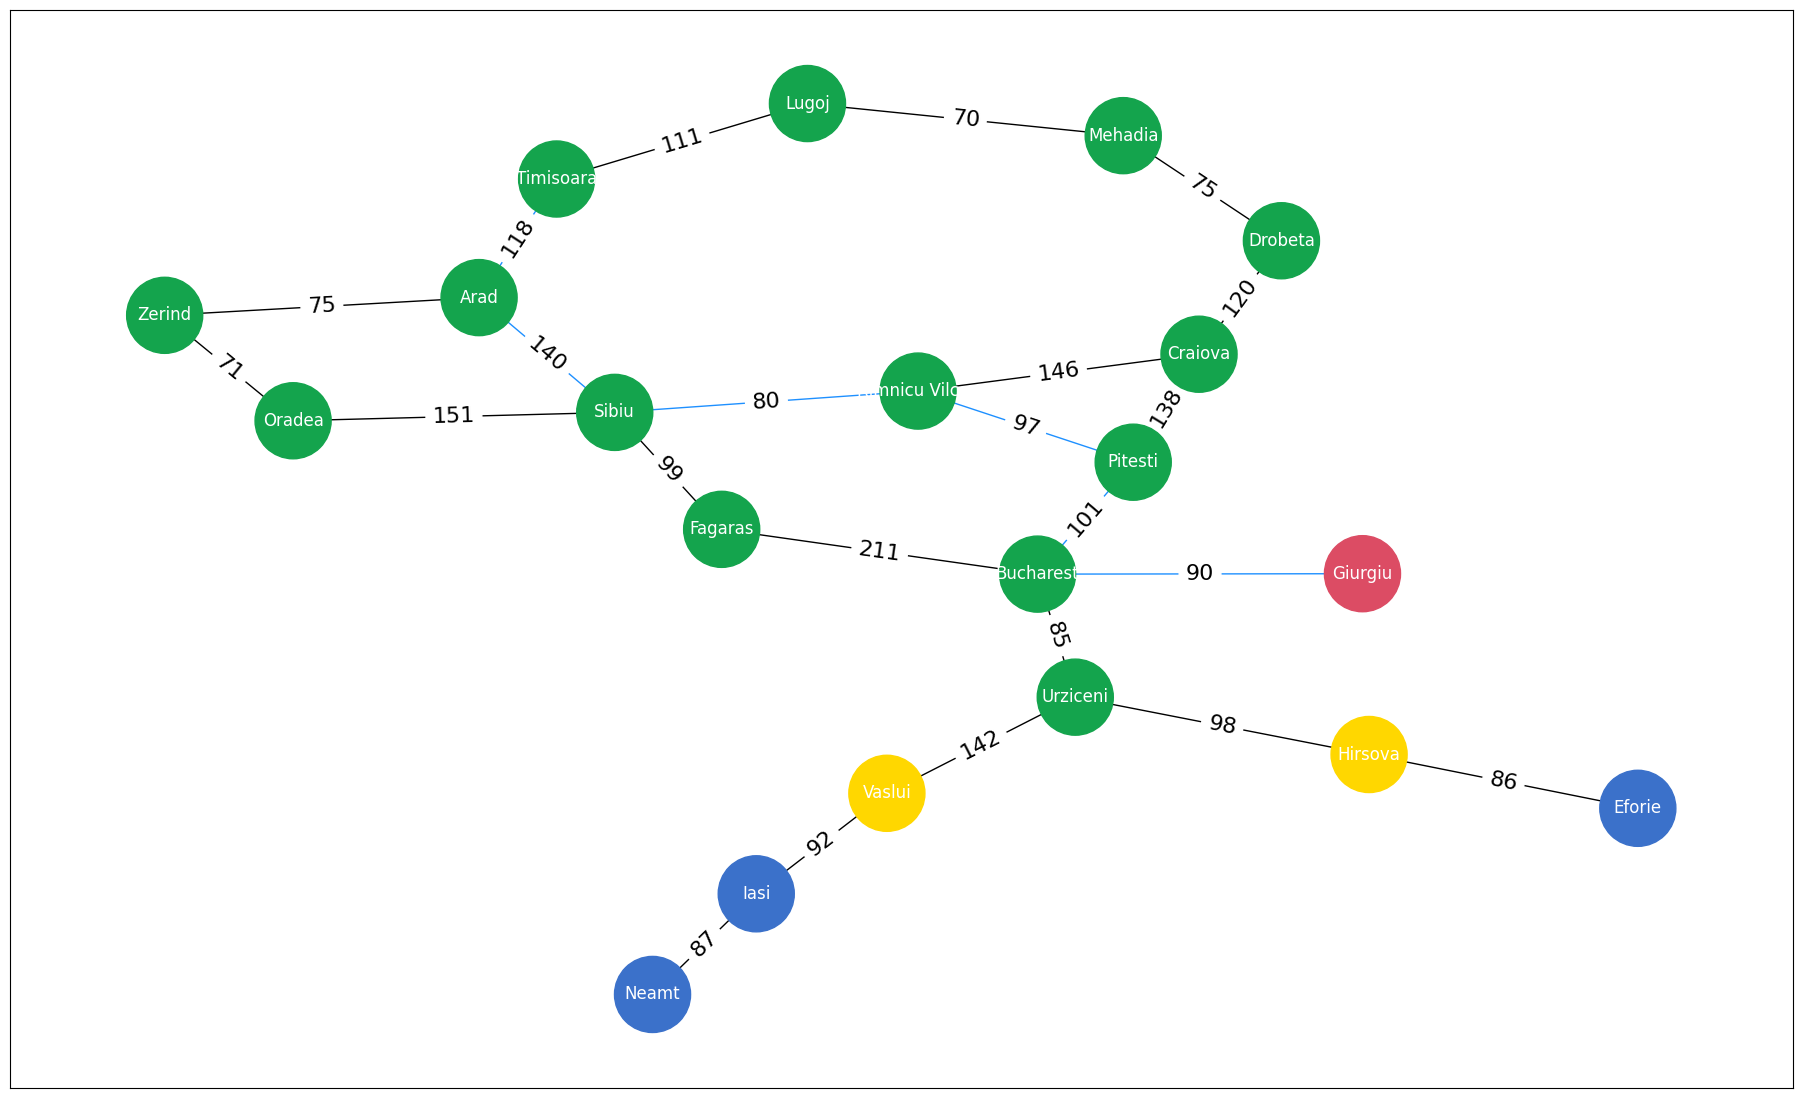

path: Timisoara -> Arad -> Sibiu -> Rimnicu Vilcea -> Pitesti -> Bucharest -> Giurgiu


In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
from queue import PriorityQueue

warnings.filterwarnings('ignore')


class MyGraph:
    
   def __init__(self, adj_list: dict, g_type='directed') -> None:
        if g_type == 'directed':
            self.g = nx.DiGraph()
        else:
            self.g = nx.Graph()

        self.g.add_nodes_from(adj_list.keys())
        for u, neighbors in adj_list.items():
            for nb, weight in neighbors:
                self.g.add_edge(u, nb, weight=weight)  # Gán trọng số cạnh là giá trị weight

        self.pos = nx.nx_pydot.pydot_layout(self.g)
        self.visited = {node: False for node in self.g.nodes}
        self.queue = PriorityQueue()  # Sử dụng hàng đợi ưu tiên để triển khai Uniform Cost Search
        self.prev = {node: None for node in self.g.nodes}
        self.current = ''

   def plot(self, path=None) -> None:
        node_color = []
        edge_color = []
        for node in self.g.nodes:
            if node == self.current:
                node_color.append('#DC4C64')
            elif self.visited[node]:
                node_color.append('#14A44D')
            elif node in [item[1] for item in self.queue.queue]:
                node_color.append('#FFD700')  # Đỉnh đang trong hàng đợi được tô màu vàng
            elif path and node in path:
                node_color.append('#ff8c00')  # Color the nodes in the final path differently
            else:
                node_color.append('#3B71CA')

        for u, v in self.g.edges:
            if path and u in path and v in path:
                edge_color.append('#1e90ff')  # Highlight edges in the final path
            else:
                edge_color.append('black')

        plt.figure(figsize=(23, 14))

        edge_labels = nx.get_edge_attributes(self.g, 'weight')
        nx.draw_networkx(
            self.g,
            pos=self.pos,
            node_color=node_color,
            edge_color=edge_color,  # Specify edge colors
            node_size=3000,
            font_color="white")

        nx.draw_networkx_edge_labels(self.g, pos=self.pos, edge_labels=edge_labels, font_size=16)
        plt.show()


   def extract_path(self, vertex: str) -> str:
        if self.prev[vertex] is None:
            return vertex
        return f"{self.extract_path(self.prev[vertex])} -> {vertex}"

   def uniform_cost_search(self, source: str, target: str) -> None:
        self.plot()  # Initial plot
        self.queue.put((0, source))
        costs = {node: float('inf') for node in self.g.nodes}
        costs[source] = 0

        while not self.queue.empty():
            accumulated_cost, self.current = self.queue.get()
            self.visited[self.current] = True

            # Plot the current state after each node is visited
            self.plot(path=self.extract_path(self.current))

            if self.current == target:
                break

            for neighbor in self.g.neighbors(self.current):
                edge_data = self.g.get_edge_data(self.current, neighbor)
                new_cost = accumulated_cost + edge_data['weight']

                if new_cost < costs[neighbor]:
                    costs[neighbor] = new_cost
                    self.queue.put((new_cost, neighbor))
                    self.prev[neighbor] = self.current

        # Plot the final path
        self.plot(path=self.extract_path(target))
        path = self.extract_path(target)
        print(f"path: {path}")
    
adj_list = {
    'Arad': [('Sibiu', 140), ('Timisoara', 118), ('Zerind', 75)],
    'Bucharest': [('Fagaras', 211), ('Giurgiu', 90), ('Pitesti', 101), ('Urziceni', 85)],
    'Craiova': [('Drobeta', 120), ('Pitesti', 138), ('Rimnicu Vilcea', 146)],
    'Drobeta': [('Craiova', 120), ('Mehadia', 75)],
    'Eforie': [('Hirsova', 86)],
    'Fagaras': [('Bucharest', 211), ('Sibiu', 99)],
    'Giurgiu': [('Bucharest', 90)],
    'Hirsova': [('Eforie', 86), ('Urziceni', 98)],
    'Iasi': [('Neamt', 87), ('Vaslui', 92)],
    'Lugoj': [('Mehadia', 70), ('Timisoara', 111)],
    'Mehadia': [('Drobeta', 75), ('Lugoj', 70)],
    'Neamt': [('Iasi', 87)],
    'Oradea': [('Sibiu', 151), ('Zerind', 71)],
    'Pitesti': [('Bucharest', 101), ('Craiova', 138), ('Rimnicu Vilcea', 97)],
    'Rimnicu Vilcea': [('Craiova', 146), ('Pitesti', 97), ('Sibiu', 80)],
    'Sibiu': [('Arad', 140), ('Fagaras', 99), ('Oradea', 151), ('Rimnicu Vilcea', 80)],
    'Timisoara': [('Arad', 118), ('Lugoj', 111)],
    'Urziceni': [('Bucharest', 85), ('Hirsova', 98), ('Vaslui', 142)],
    'Vaslui': [('Iasi', 92), ('Urziceni', 142)],
    'Zerind': [('Arad', 75), ('Oradea', 71)],
}
g = MyGraph(adj_list, g_type='undirected')
g.uniform_cost_search(source='Timisoara', target='Giurgiu')